# Descrição do problema.
 
* Objetivo principal deste projeto será a criação de um modelo de machine learning para prever se uma pessoa que foi contratada por uma determinada empresa vai ficar mais de um ano trabalhando nela ou não.
 
* Os dados foram disponibilizados pela comunidade Flai. Onde eles são compostos pelas seguintes variáveis:
 
 * **func_sexo:** Sexo da pessoa.
 * **func_idade:** Idade do usuário.
 * **func_racacor:** Raça da pessoa segundo a classificação do IBGE.
 * **func_escolaridade:** Escolaridade das pessoas.
 * **func_uf:** Estado da pessoa
 * **func_deficiencia:** Se a pessoa é deficiente ou não.
 * **empresa_porte:** Número de funcionários da empresa.
 * **empresa_setor:** Setor que a empresa trabalha.
 * **contrato_horastrabalho:** Quantidade de horas por semana de trabalho.
 * **contrato_salario:** Valor do salário da pessoa na empresa.
 * **turnover_apos_1_ano:** Se a pessoa trabalhou lá mais de um ano ou não.
 
 
 
 
 


# Objetivo

* Este notebook tem como finalidade conhecer as características de cada variável e realizar o tratamento dos dados.


# Metodologia.
 
* As características de cada variável será conhecida através de plots como o histograma, linearidade e etc.
 
* Para verificar se os tratamentos que foram feitos surtiuram algum efeito, será adotado a seguinte estratégia:
 
 * **Primeiro passo:** Adotando um classificador padrão, no caso foi escolhida a Floresta aleatória.
 * **Segundo passo:** Treinar o modelo e avaliar o seu desempenho pela validação cruzada.
 * **Terceiro passo:** Tratar cada variável individualmente e ver se o desempenho do modelo padrão melhorou. Caso não aconteça nenhuma melhora o tratamento que foi feito será descartado.
 
 


# Instalando bibliotecas





In [ ]:
!pip install category_encoders

#Bilbiotecas

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import f1_score
from category_encoders import CountEncoder
from category_encoders import TargetEncoder
import statistics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Funções

In [ ]:
def encoder_var(df,flag):
  if flag == 1:
    ind = df.columns[df.dtypes == 'object']
  if flag == 0:
     ind = df.columns[df.dtypes == 'category']

  for i in range(len(ind)):
    enc = LabelEncoder()
    inteiros = enc.fit_transform(df[ind[i]])
    df[ind[i]] = inteiros

  return df
  

def resultados(X_train,y_train,linhas_treino,linhas_valid,flag,coluna,suport):
  if suport == 'Dataframe':
    X_t, X_v = X_train.loc[linhas_treino], X_train.loc[linhas_valid]
    y_t, y_v = y_train.loc[linhas_treino], y_train.loc[linhas_valid]

  if suport == 'array':
    X_t, X_v = X_train[linhas_treino], X_train[linhas_valid]
    y_t, y_v = y_train[linhas_treino], y_train[linhas_valid]

  if flag == 'CountEncoder':
      cenc = CountEncoder(normalize=False)
      X_t[coluna] = cenc.fit_transform(X_t[coluna],y_t)
      X_v[coluna] = cenc.transform(X_v[coluna])

  if flag == 'TargetEncoder':
      tenc = TargetEncoder()
      X_t[coluna] = tenc.fit_transform(X_t[coluna],y_t)
      X_v[coluna] = tenc.transform(X_v[coluna])

  model = RandomForestClassifier(n_estimators=100,random_state=10)
  model = model.fit(X_t, y_t)
  prf = model.predict_proba(X_v)[:,1]
  prf_ = (prf > 0.5).astype(int)

  acerto_v = f1_score(y_v, prf_)

  print('f1_score',np.format_float_positional(acerto_v,5))
  return acerto_v




def enconder_label(col,df):
  for i in range(len(col)):
    enc = LabelEncoder()
    inteiros = enc.fit_transform(df[col[i]])
    df[col[i]] = inteiros

  return df


# Importando os dados




In [ ]:
df = pd.read_csv('/content/drive/My Drive/competição flai nova/treino.csv',encoding = "UTF-8", sep = ";",decimal = ',',dayfirst = True)

# Informações básicas dos dados.

In [ ]:
df.head() # olhando o dataflame

,func_sexo,func_idade,func_racacor,func_escolaridade,func_uf,func_deficiencia,empresa_porte,empresa_setor,contrato_horastrabalho,contrato_salario,turnover_apos_1_ano
0,MASCULINO,24,AMARELA-BRANCA,MEDIO COMPLETO,RN,NAO,DE 10 A 19,Serviços,44,1750.65,SIM
1,MASCULINO,24,SEM INFO,MEDIO COMPLETO,BA,NAO,ATE 4,Comércio,44,1002.30,NAO
2,FEMININO,25,PRETA-PARDA,MEDIO COMPLETO,SE,NAO,DE 20 A 49,Comércio,44,1370.14,NAO
3,MASCULINO,54,PRETA-PARDA,MEDIO COMPLETO,PE,NAO,DE 20 A 49,Comércio,44,1854.68,SIM
4,MASCULINO,40,PRETA-PARDA,MEDIO COMPLETO,BA,NAO,DE 20 A 49,Comércio,0,1126.23,NAO


In [ ]:
# tamanho do dataset
print('Número de linhas',df.shape[0])
print('Número de colunas',df.shape[0])

Número de linhas 15000
Número de colunas 15000


In [ ]:
# Quantidade de dados nulos
df.isnull().sum(axis =0)

func_sexo                 0
func_idade                0
func_racacor              0
func_escolaridade         0
func_uf                   0
func_deficiencia          0
empresa_porte             0
empresa_setor             0
contrato_horastrabalho    0
contrato_salario          0
turnover_apos_1_ano       0
dtype: int64

In [ ]:
print('Quantidade de dados unicos')
for i in range(len(df.columns)):
  print(df.columns[i],':',len(df[df.columns[i]].unique()))

Quantidade de dados unicos
func_sexo : 2
func_idade : 62
func_racacor : 4
func_escolaridade : 5
func_uf : 9
func_deficiencia : 2
empresa_porte : 9
empresa_setor : 6
contrato_horastrabalho : 45
contrato_salario : 12997
turnover_apos_1_ano : 2


In [ ]:
print('Tipos das colunas')
print(df.dtypes,'\n')

Tipos das colunas
func_sexo                  object
func_idade                  int64
func_racacor               object
func_escolaridade          object
func_uf                    object
func_deficiencia           object
empresa_porte              object
empresa_setor              object
contrato_horastrabalho      int64
contrato_salario          float64
turnover_apos_1_ano        object
dtype: object 



# Distribuições dos dados

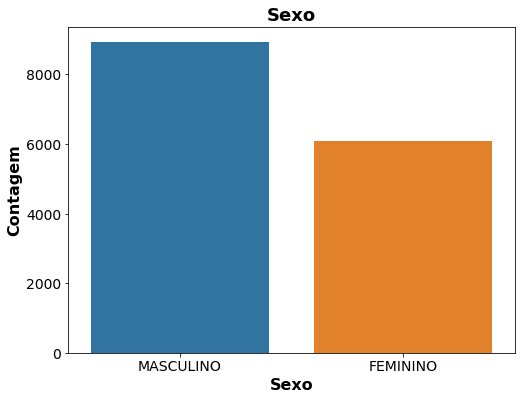



Porcetagem das classes no dataset


MASCULINO    0.595
FEMININO     0.405
Name: func_sexo, dtype: float64

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Sexo',fontsize= 18, fontweight= 'bold')
sns.countplot(x = 'func_sexo',data = df)

plt.xlabel('Sexo', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print('\n')
print('Porcetagem das classes no dataset')
df['func_sexo'].value_counts()/df.shape[0]

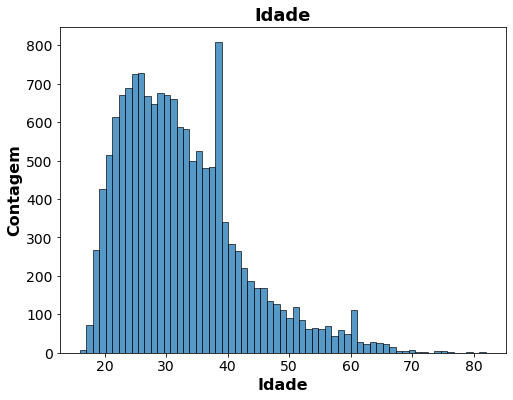

Descrição:
Idade minima   : 16
Idade minima   : 82
Idade média    : 33.0
Desvioo padrão : 10.0
Moda           : 26


In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Idade',fontsize= 18, fontweight= 'bold')
sns.histplot(x='func_idade',data=df)
plt.xlabel('Idade', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print("Descrição:")
print("Idade minima   :", df['func_idade'].min())
print("Idade minima   :", df['func_idade'].max())
print("Idade média    :", np.round(df['func_idade'].mean()))
print("Desvioo padrão :", np.round(df['func_idade'].std()))
print('Moda           :',statistics.mode(df['func_idade']))

* A distribuição é assimétrica positiva e com uma grande quantidade de outliers depois de 60 anos.
 
* Uma transformação simples de log pode melhorar essa dispersão.

In [ ]:
df['func_idade_log'] = np.log(df['func_idade']) # Aplicando ln nos dados 

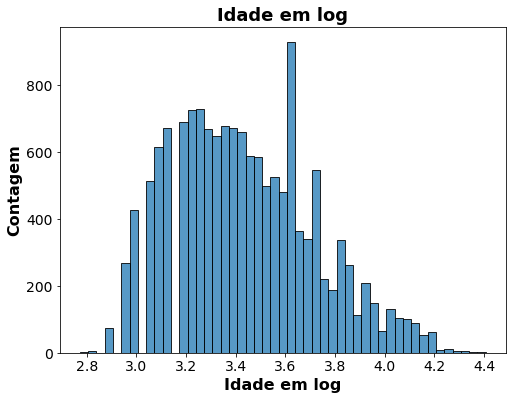

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Idade em log',fontsize= 18, fontweight= 'bold')
sns.histplot(x='func_idade_log',data=df)
plt.xlabel('Idade em log', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()


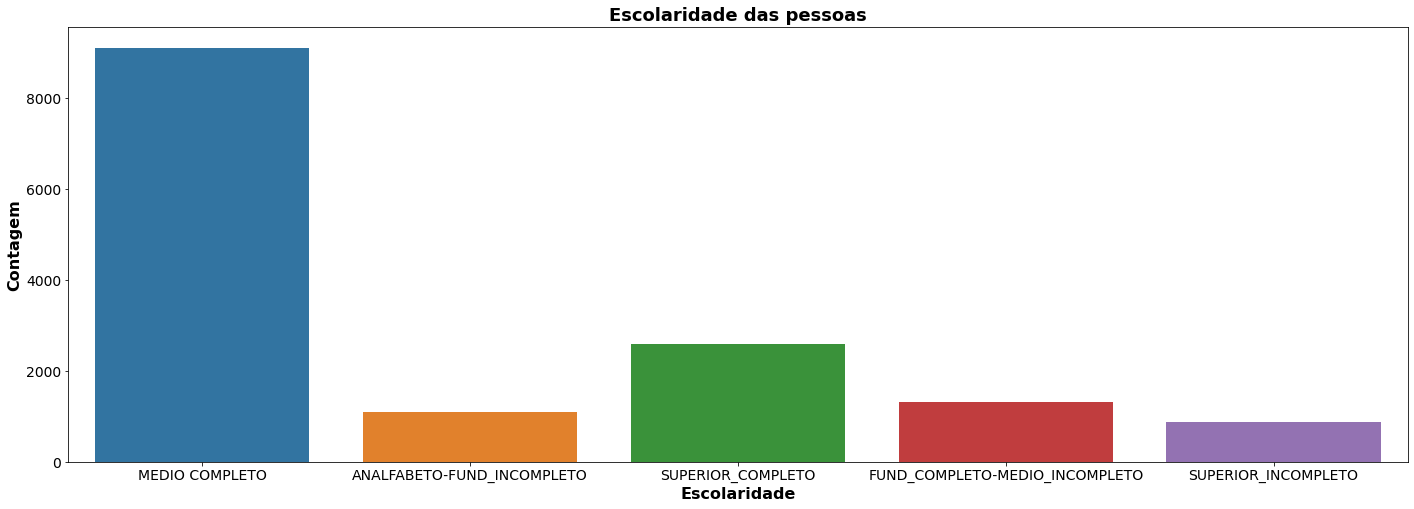



Porcetagem das classes no dataset


MEDIO COMPLETO                    0.607733
SUPERIOR_COMPLETO                 0.173467
FUND_COMPLETO-MEDIO_INCOMPLETO    0.087733
ANALFABETO-FUND_INCOMPLETO        0.073133
SUPERIOR_INCOMPLETO               0.057933
Name: func_escolaridade, dtype: float64

In [ ]:

plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(24,8))
plt.title('Escolaridade das pessoas',fontsize= 18, fontweight= 'bold')
sns.countplot(x = 'func_escolaridade',data = df)

plt.xlabel('Escolaridade', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print('\n')
print('Porcetagem das classes no dataset')
df['func_escolaridade'].value_counts()/df.shape[0]

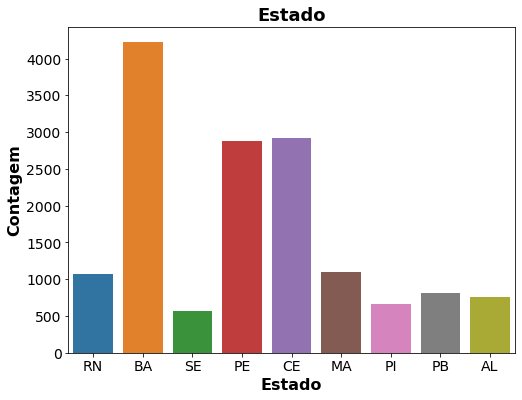



Porcetagem das classes no dataset


BA    0.281533
CE    0.194267
PE    0.192133
MA    0.073133
RN    0.071800
PB    0.054600
AL    0.050733
PI    0.043933
SE    0.037867
Name: func_uf, dtype: float64

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Estado',fontsize= 18, fontweight= 'bold')
sns.countplot(x = 'func_uf',data = df)

plt.xlabel('Estado', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print('\n')
print('Porcetagem das classes no dataset')
df['func_uf'].value_counts()/df.shape[0]

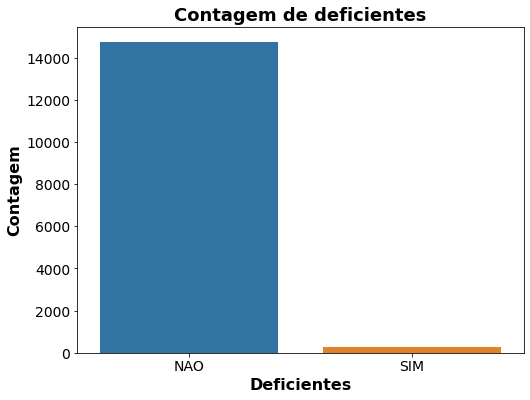



Porcetagem das classes no dataset


NAO    0.9824
SIM    0.0176
Name: func_deficiencia, dtype: float64

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Contagem de deficientes',fontsize= 18, fontweight= 'bold')
sns.countplot(x = 'func_deficiencia',data = df)

plt.xlabel('Deficientes', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print('\n')
print('Porcetagem das classes no dataset')
df['func_deficiencia'].value_counts()/df.shape[0]

* Existe uma baixa quantidade de amostras de dificientes, talvez essa quantidade não seja o suficientes para o modelo aprender sobre essa classe.

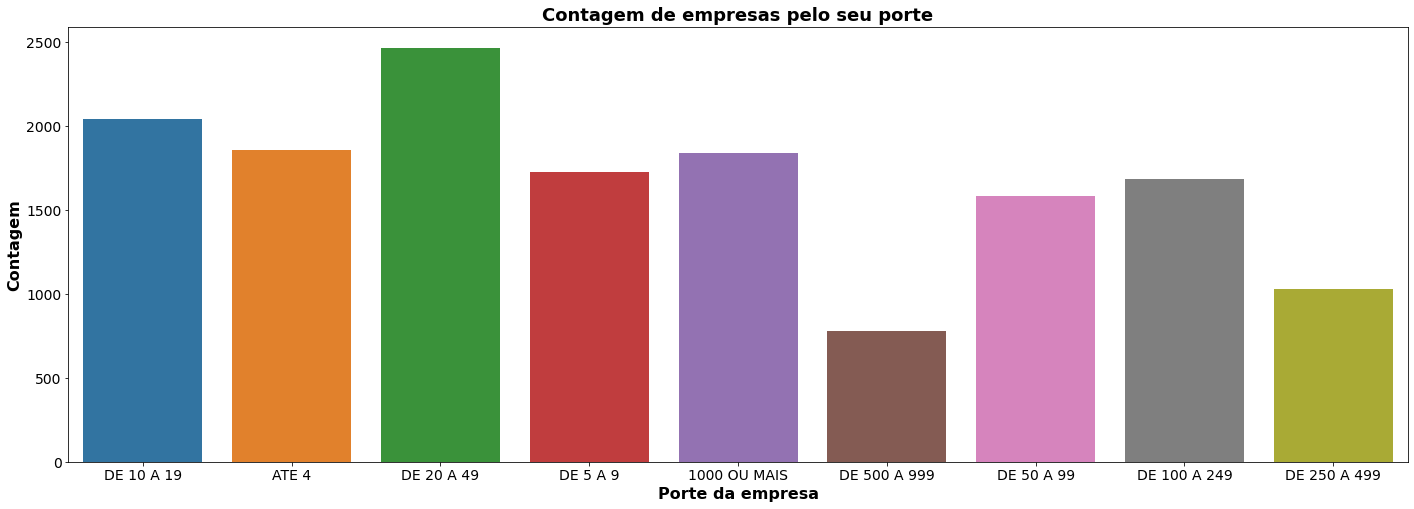



Porcetagem das classes no dataset


DE 20 A 49      0.164400
DE 10 A 19      0.136067
ATE 4           0.123600
1000 OU MAIS    0.122667
DE 5 A 9        0.115000
DE 100 A 249    0.112200
DE 50 A 99      0.105533
DE 250 A 499    0.068733
DE 500 A 999    0.051800
Name: empresa_porte, dtype: float64

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(24,8))
plt.title('Contagem de empresas pelo seu porte',fontsize= 18, fontweight= 'bold')
sns.countplot(x = 'empresa_porte',data = df)

plt.xlabel('Porte da empresa', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print('\n')
print('Porcetagem das classes no dataset')
df['empresa_porte'].value_counts()/df.shape[0]

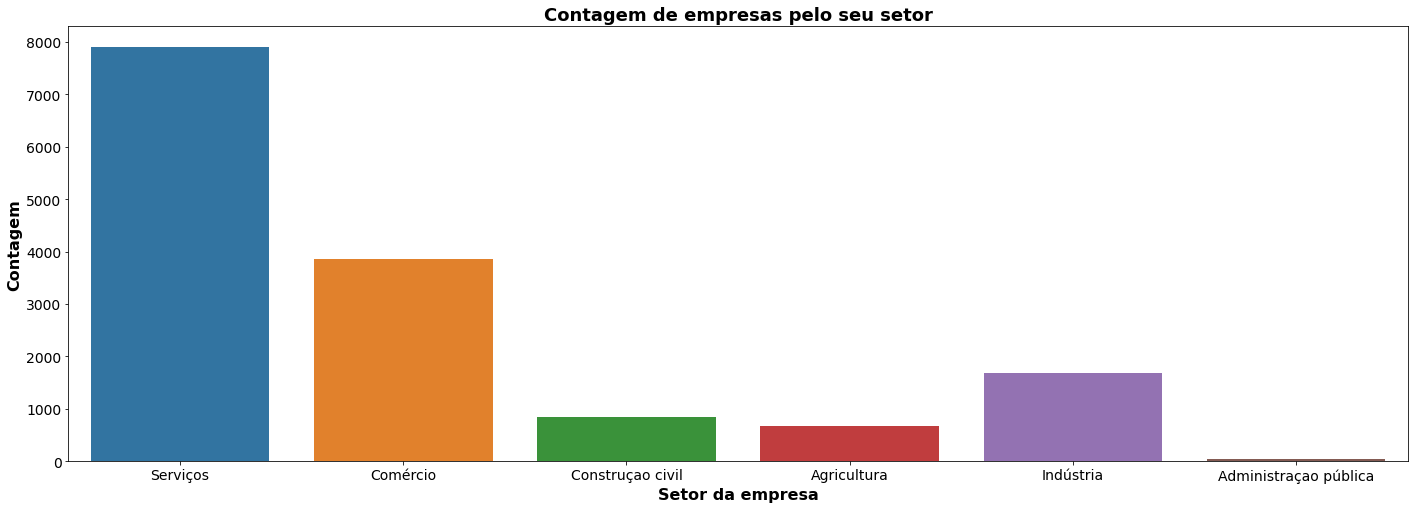



Porcetagem das classes no dataset


Serviços                 0.526867
Comércio                 0.257200
Indústria                0.111867
Construçao civil         0.056200
Agricultura              0.045200
Administraçao pública    0.002667
Name: empresa_setor, dtype: float64

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(24,8))
plt.title('Contagem de empresas pelo seu setor',fontsize= 18, fontweight= 'bold')
sns.countplot(x = 'empresa_setor',data = df)

plt.xlabel('Setor da empresa', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print('\n')
print('Porcetagem das classes no dataset')
df['empresa_setor'].value_counts()/df.shape[0]

* Existe uma baixa volumetria de dados da classe Administração pública, talvez não exista amostras o suficiente para o modelo aprender sobre essa classe.
 

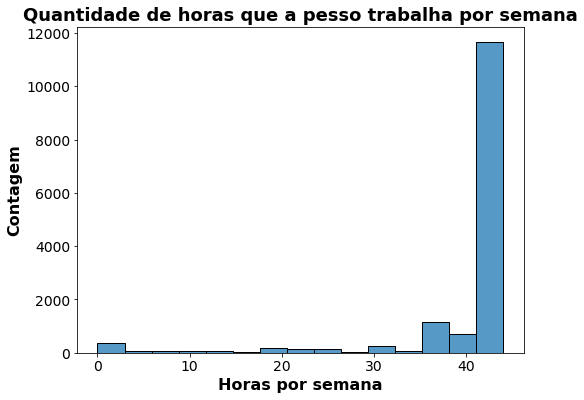

Descrição:
horas minima   : 0
horas máxima   : 44
horas média    : 40.0
Desvioo padrão : 9.0
Moda           : 44


In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Quantidade de horas que a pesso trabalha por semana',fontsize= 18, fontweight= 'bold')
sns.histplot(x='contrato_horastrabalho',data=df)
plt.xlabel('Horas por semana', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print("Descrição:")
print("horas minima   :", df['contrato_horastrabalho'].min())
print("horas máxima   :", df['contrato_horastrabalho'].max())
print("horas média    :", np.round(df['contrato_horastrabalho'].mean()))
print("Desvioo padrão :", np.round(df['contrato_horastrabalho'].std()))
print('Moda           :',statistics.mode(df['contrato_horastrabalho']))

* Existem pessoas que não possuem nenhuma hora trabalhada, talvez eles sejam outliers ou simplesmente de pessoas que trabalharam serviços autônomos.
 
* Existem muito poucos dados, para diversas horas de trabalho. Isso talvez seja prejudicial para o aprendizado do modelo padrão.

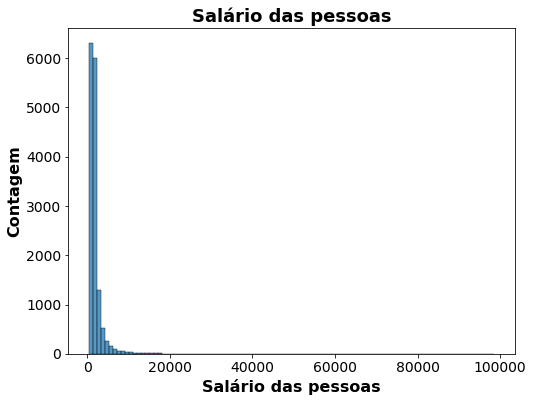

Descrição:
Salário minimo : 299.4
Salário máximo : 98641.65
Salário média  : 1954.0
Desvioo padrão : 2528.0
Moda           : 998.0


In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Salário das pessoas',fontsize= 18, fontweight= 'bold')
sns.histplot(x='contrato_salario',data=df, bins = 100)
plt.xlabel('Salário das pessoas', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print("Descrição:")
print("Salário minimo :", df['contrato_salario'].min())
print("Salário máximo :", df['contrato_salario'].max())
print("Salário média  :", np.round(df['contrato_salario'].mean()))
print("Desvioo padrão :", np.round(df['contrato_salario'].std()))
print('Moda           :',statistics.mode(df['contrato_salario']))

* O gráfico apresenta um comportamento exponencial com diversos outliers, por esse motivo ele será visto em log para poder entender melhor como os dados se comportam.

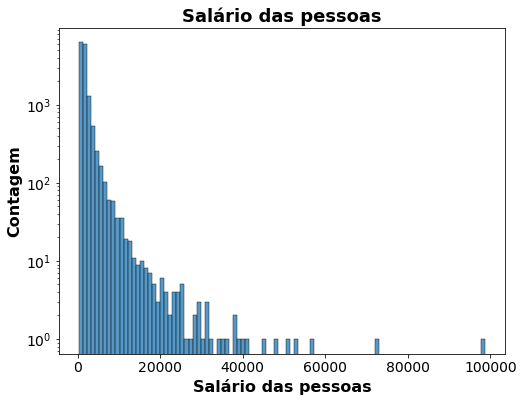

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Salário das pessoas',fontsize= 18, fontweight= 'bold')
sns.histplot(x='contrato_salario',data=df, bins = 100)
plt.xlabel('Salário das pessoas', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.semilogy()
plt.show()

* Depois de 30000 é que os outliers começam aparecer. Para melhorar essa dispersão será aplicado log nos dados.
 
 


In [ ]:
df['contrato_salario_log'] = np.log10(df['contrato_salario'])

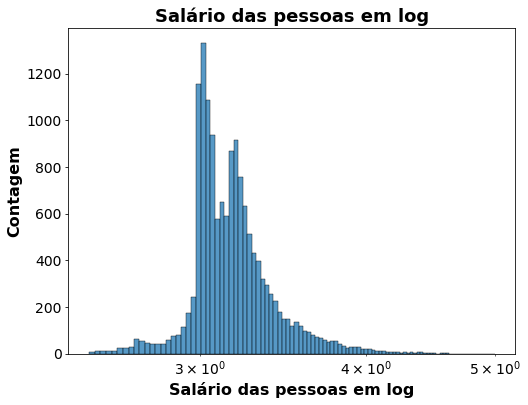

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Salário das pessoas em log',fontsize= 18, fontweight= 'bold')
sns.histplot(x='contrato_salario_log',data=df, bins = 100)
plt.xlabel('Salário das pessoas em log', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.semilogx()
plt.show()

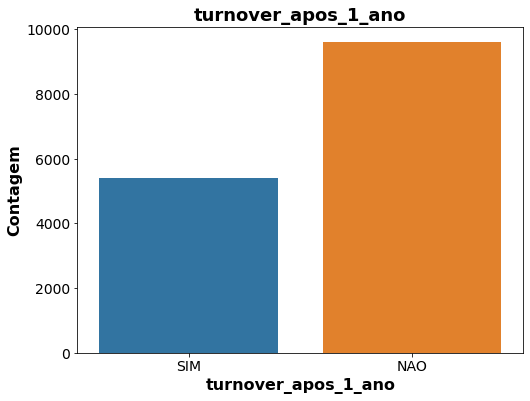



Porcetagem das classes no dataset


NAO    0.639933
SIM    0.360067
Name: turnover_apos_1_ano, dtype: float64

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('turnover_apos_1_ano',fontsize= 18, fontweight= 'bold')
sns.countplot(x = 'turnover_apos_1_ano',data = df)

plt.xlabel('turnover_apos_1_ano', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print('\n')
print('Porcetagem das classes no dataset')
df['turnover_apos_1_ano'].value_counts()/df.shape[0]

* Claramente os dados estão desbalanceados.

# Distribuição dos dados em função do Target.

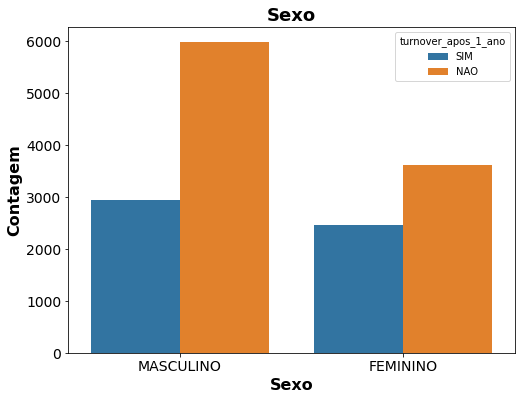



Porcetagem das classes no dataset


turnover_apos_1_ano  func_sexo
NAO                  MASCULINO    0.398867
                     FEMININO     0.241067
SIM                  MASCULINO    0.196133
                     FEMININO     0.163933
Name: func_sexo, dtype: float64

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Sexo',fontsize= 18, fontweight= 'bold')
sns.countplot(x = 'func_sexo',data = df,hue ='turnover_apos_1_ano')

plt.xlabel('Sexo', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print('\n')
print('Porcetagem das classes no dataset')
df.groupby('turnover_apos_1_ano')['func_sexo'].value_counts()/df.shape[0]

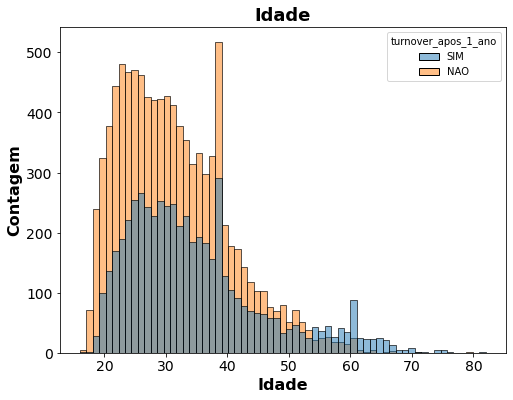

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Idade',fontsize= 18, fontweight= 'bold')
sns.histplot(x='func_idade',data=df,hue = 'turnover_apos_1_ano')
plt.xlabel('Idade', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()



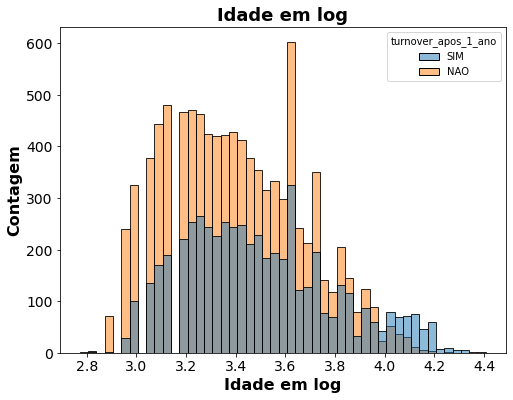

In [ ]:

plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Idade em log',fontsize= 18, fontweight= 'bold')
sns.histplot(x='func_idade_log',data=df,hue = 'turnover_apos_1_ano')
plt.xlabel('Idade em log', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()


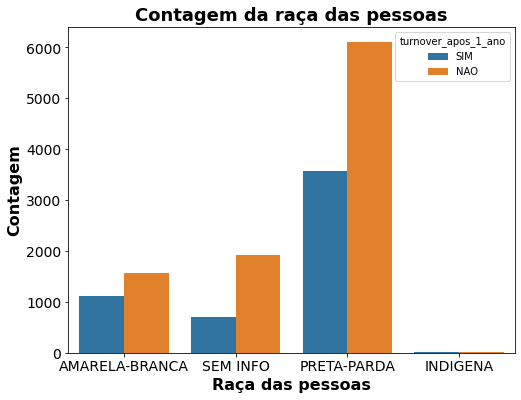



Porcetagem das classes no dataset


turnover_apos_1_ano  func_racacor  
NAO                  PRETA-PARDA       0.406933
                     SEM INFO          0.127733
                     AMARELA-BRANCA    0.104467
                     INDIGENA          0.000800
SIM                  PRETA-PARDA       0.238533
                     AMARELA-BRANCA    0.074467
                     SEM INFO          0.046333
                     INDIGENA          0.000733
Name: func_racacor, dtype: float64

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Contagem da raça das pessoas',fontsize= 18, fontweight= 'bold')
sns.countplot(x = 'func_racacor',data = df,hue ='turnover_apos_1_ano')

plt.xlabel('Raça das pessoas', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print('\n')
print('Porcetagem das classes no dataset')
df.groupby('turnover_apos_1_ano')['func_racacor'].value_counts()/df.shape[0]

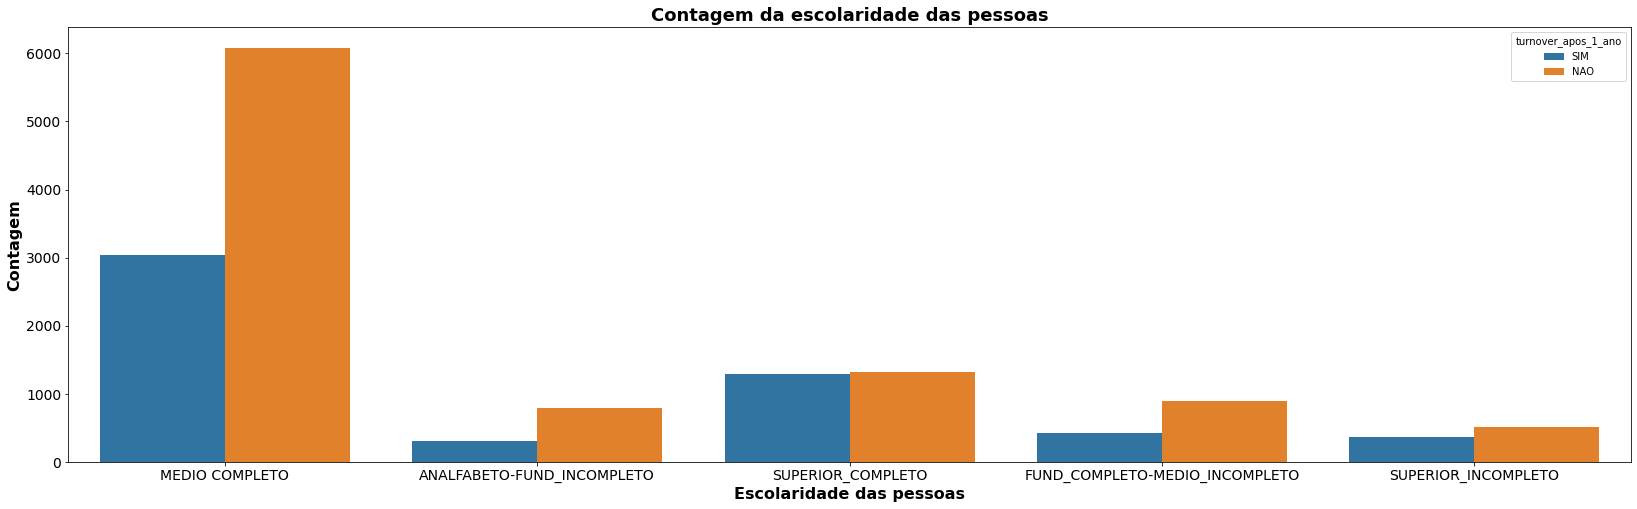



Porcetagem das classes no dataset


turnover_apos_1_ano  func_escolaridade             
NAO                  MEDIO COMPLETO                    0.405667
                     SUPERIOR_COMPLETO                 0.087467
                     FUND_COMPLETO-MEDIO_INCOMPLETO    0.060000
                     ANALFABETO-FUND_INCOMPLETO        0.052733
                     SUPERIOR_INCOMPLETO               0.034067
SIM                  MEDIO COMPLETO                    0.202067
                     SUPERIOR_COMPLETO                 0.086000
                     FUND_COMPLETO-MEDIO_INCOMPLETO    0.027733
                     SUPERIOR_INCOMPLETO               0.023867
                     ANALFABETO-FUND_INCOMPLETO        0.020400
Name: func_escolaridade, dtype: float64

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(28,8))
plt.title('Contagem da escolaridade das pessoas',fontsize= 18, fontweight= 'bold')
sns.countplot(x = 'func_escolaridade',data = df,hue ='turnover_apos_1_ano')

plt.xlabel('Escolaridade das pessoas', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print('\n')
print('Porcetagem das classes no dataset')
df.groupby('turnover_apos_1_ano')['func_escolaridade'].value_counts()/df.shape[0]

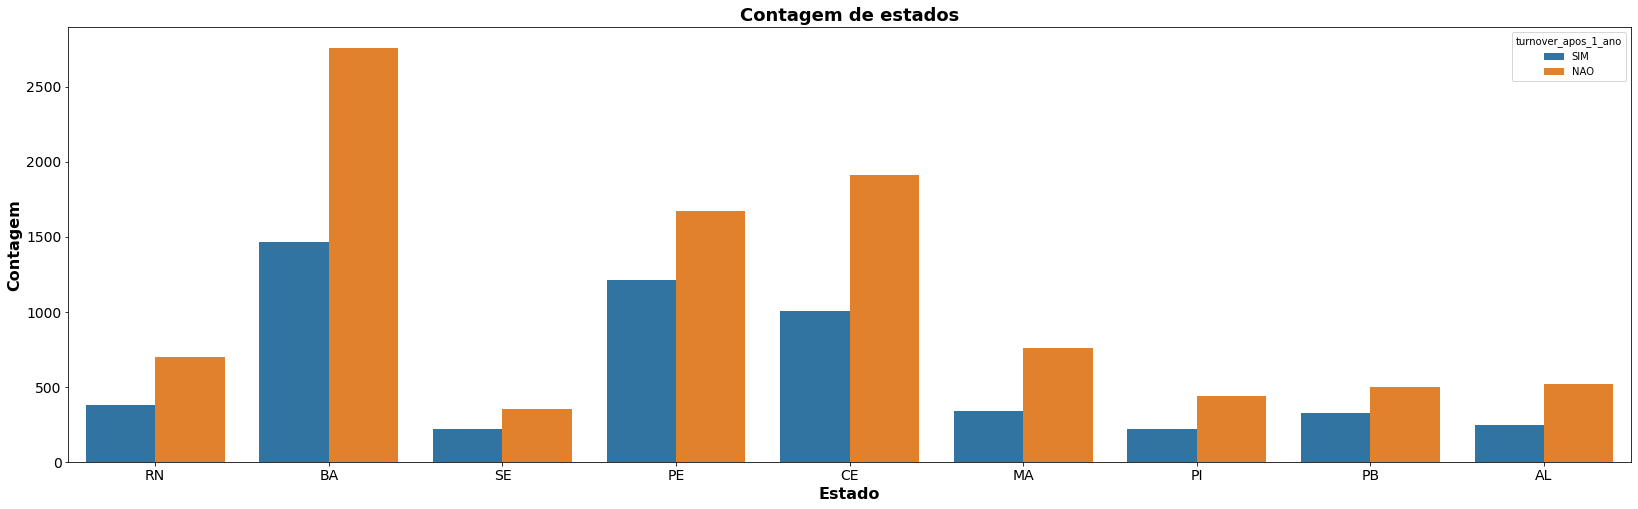



Porcetagem das classes no dataset


turnover_apos_1_ano  func_uf
NAO                  BA         0.184000
                     CE         0.127400
                     PE         0.111333
                     MA         0.050667
                     RN         0.046400
                     AL         0.034467
                     PB         0.033067
                     PI         0.029200
                     SE         0.023400
SIM                  BA         0.097533
                     PE         0.080800
                     CE         0.066867
                     RN         0.025400
                     MA         0.022467
                     PB         0.021533
                     AL         0.016267
                     PI         0.014733
                     SE         0.014467
Name: func_uf, dtype: float64

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(28,8))
plt.title('Contagem de estados',fontsize= 18, fontweight= 'bold')
sns.countplot(x = 'func_uf',data = df,hue ='turnover_apos_1_ano')

plt.xlabel('Estado', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print('\n')
print('Porcetagem das classes no dataset')
df.groupby('turnover_apos_1_ano')['func_uf'].value_counts()/df.shape[0]

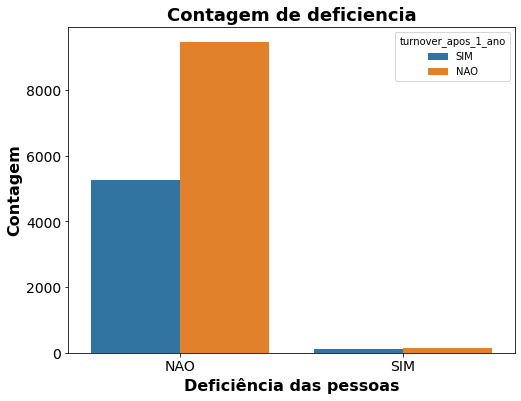



Porcetagem das classes no dataset


turnover_apos_1_ano  func_deficiencia
NAO                  NAO                 0.630600
                     SIM                 0.009333
SIM                  NAO                 0.351800
                     SIM                 0.008267
Name: func_deficiencia, dtype: float64

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Contagem de deficiencia',fontsize= 18, fontweight= 'bold')
sns.countplot(x = 'func_deficiencia',data = df,hue ='turnover_apos_1_ano')

plt.xlabel('Deficiência das pessoas', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print('\n')
print('Porcetagem das classes no dataset')
df.groupby('turnover_apos_1_ano')['func_deficiencia'].value_counts()/df.shape[0]

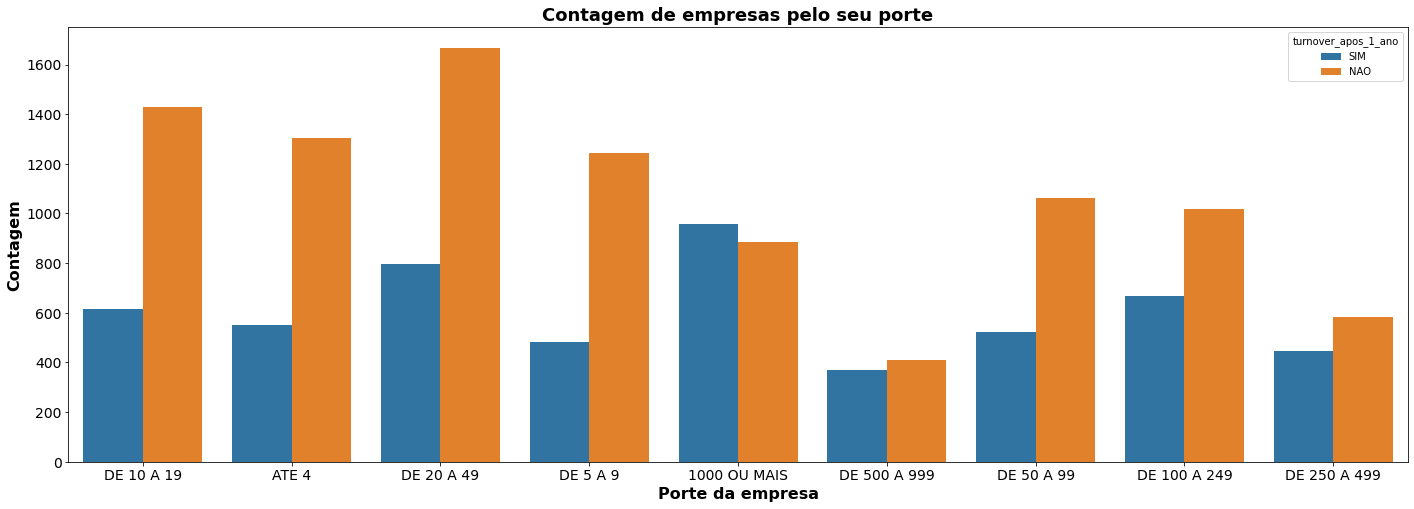



Porcetagem das classes no dataset


turnover_apos_1_ano  empresa_porte
NAO                  DE 20 A 49       0.111200
                     DE 10 A 19       0.095133
                     ATE 4            0.087000
                     DE 5 A 9         0.082933
                     DE 50 A 99       0.070733
                     DE 100 A 249     0.067800
                     1000 OU MAIS     0.058933
                     DE 250 A 499     0.039000
                     DE 500 A 999     0.027200
SIM                  1000 OU MAIS     0.063733
                     DE 20 A 49       0.053200
                     DE 100 A 249     0.044400
                     DE 10 A 19       0.040933
                     ATE 4            0.036600
                     DE 50 A 99       0.034800
                     DE 5 A 9         0.032067
                     DE 250 A 499     0.029733
                     DE 500 A 999     0.024600
Name: empresa_porte, dtype: float64

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(24,8))
plt.title('Contagem de empresas pelo seu porte',fontsize= 18, fontweight= 'bold')
sns.countplot(x = 'empresa_porte',data = df,hue ='turnover_apos_1_ano')

plt.xlabel('Porte da empresa', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print('\n')
print('Porcetagem das classes no dataset')
df.groupby('turnover_apos_1_ano')['empresa_porte'].value_counts()/df.shape[0]

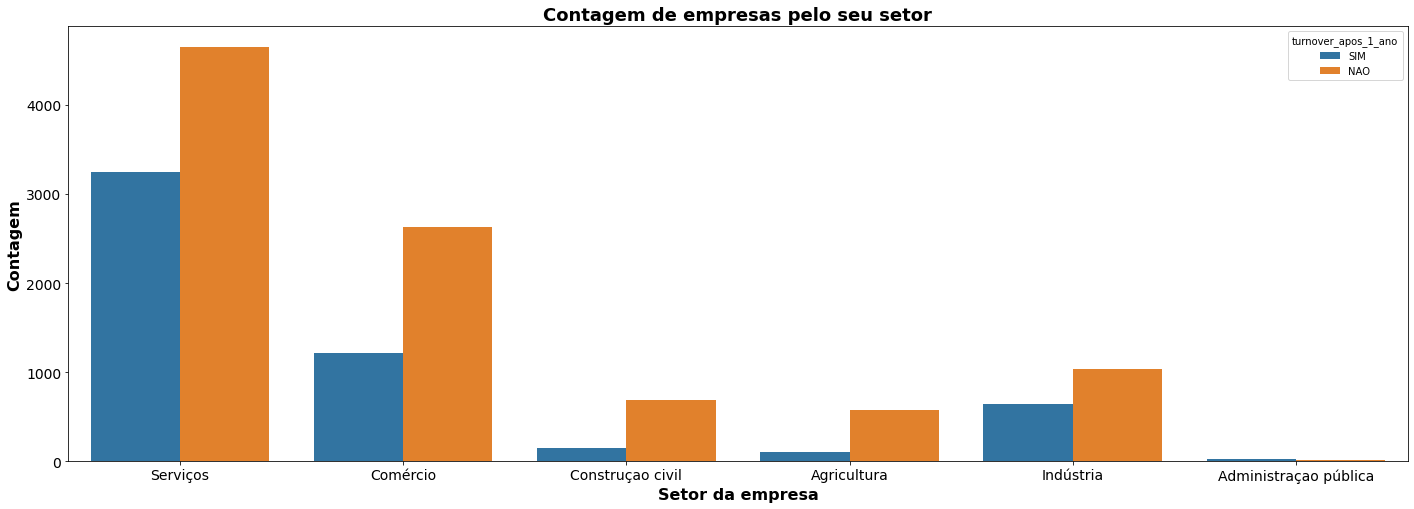



Porcetagem das classes no dataset


turnover_apos_1_ano  empresa_setor        
NAO                  Serviços                 0.310133
                     Comércio                 0.175733
                     Indústria                0.069067
                     Construçao civil         0.046067
                     Agricultura              0.038267
                     Administraçao pública    0.000667
SIM                  Serviços                 0.216733
                     Comércio                 0.081467
                     Indústria                0.042800
                     Construçao civil         0.010133
                     Agricultura              0.006933
                     Administraçao pública    0.002000
Name: empresa_setor, dtype: float64

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(24,8))
plt.title('Contagem de empresas pelo seu setor',fontsize= 18, fontweight= 'bold')
sns.countplot(x = 'empresa_setor',data = df,hue = 'turnover_apos_1_ano')

plt.xlabel('Setor da empresa', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

print('\n')
print('Porcetagem das classes no dataset')
df.groupby('turnover_apos_1_ano')['empresa_setor'].value_counts()/df.shape[0]

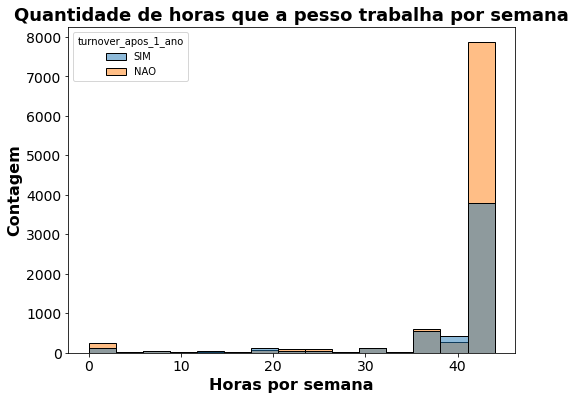

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Quantidade de horas que a pesso trabalha por semana',fontsize= 18, fontweight= 'bold')
sns.histplot(x='contrato_horastrabalho',data=df,hue = 'turnover_apos_1_ano')
plt.xlabel('Horas por semana', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.show()

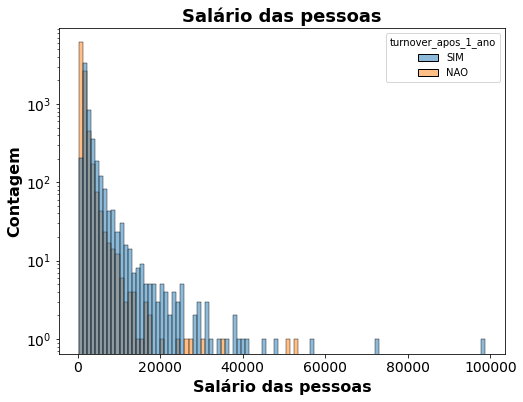

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Salário das pessoas',fontsize= 18, fontweight= 'bold')
sns.histplot(x='contrato_salario',data=df, bins = 100,hue = 'turnover_apos_1_ano')
plt.xlabel('Salário das pessoas', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.semilogy()
plt.show()

* Apenas no primeiro bin é que a contagem de pessoas que não saíram do emprego após um ano é maior do que aquelas que saíram. Isso pode ser um indício que essa variável é extremamente importante para o modelo.
 
 


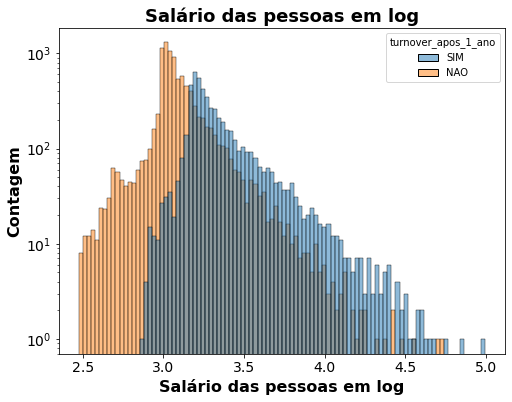

In [ ]:
plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.figure(figsize=(8,6))
plt.title('Salário das pessoas em log',fontsize= 18, fontweight= 'bold')
sns.histplot(x='contrato_salario_log',data=df, bins = 100,hue = 'turnover_apos_1_ano')
plt.xlabel('Salário das pessoas em log', fontsize= 16, fontweight= 'bold')
plt.ylabel('Contagem', fontsize= 16, fontweight= 'bold')
plt.semilogy()
plt.show()

# Estudo de melhor maneira de tratar cada variável
 
### Primeiro teste: Verificando se aplicação do logaritmo nos dados surtiram efeito
 
* A princípio todas as variáveis categóricas serão codificadas pelo label encoder.
 
 


In [ ]:
df_aux = df.copy() 

In [ ]:
df_aux['turnover_apos_1_ano'] = df_aux['turnover_apos_1_ano'].map({'NAO': 0, 'SIM': 1})
df_aux['func_deficiencia'] = df_aux['func_deficiencia'].map({'NAO': 0, 'SIM': 1})
df_aux['func_sexo'] = df_aux['func_sexo'].map({'FEMININO': 0, 'MASCULINO': 1})

In [ ]:
df1 = df_aux.copy()

In [ ]:
df1.head()

,func_sexo,func_idade,func_racacor,func_escolaridade,func_uf,func_deficiencia,empresa_porte,empresa_setor,contrato_horastrabalho,contrato_salario,turnover_apos_1_ano,func_idade_log,contrato_salario_log
0,1,24,AMARELA-BRANCA,MEDIO COMPLETO,RN,0,DE 10 A 19,Serviços,44,1750.65,1,3.178054,3.243199
1,1,24,SEM INFO,MEDIO COMPLETO,BA,0,ATE 4,Comércio,44,1002.30,0,3.178054,3.000998
2,0,25,PRETA-PARDA,MEDIO COMPLETO,SE,0,DE 20 A 49,Comércio,44,1370.14,0,3.218876,3.136765
3,1,54,PRETA-PARDA,MEDIO COMPLETO,PE,0,DE 20 A 49,Comércio,44,1854.68,1,3.988984,3.268269
4,1,40,PRETA-PARDA,MEDIO COMPLETO,BA,0,DE 20 A 49,Comércio,0,1126.23,0,3.688879,3.051627


In [ ]:
df1 = encoder_var(df1,1) 

In [ ]:
df1.head() 

,func_sexo,func_idade,func_racacor,func_escolaridade,func_uf,func_deficiencia,empresa_porte,empresa_setor,contrato_horastrabalho,contrato_salario,turnover_apos_1_ano,func_idade_log,contrato_salario_log
0,1,24,0,2,7,0,2,5,44,1750.65,1,3.178054,3.243199
1,1,24,3,2,1,0,1,2,44,1002.30,0,3.178054,3.000998
2,0,25,2,2,8,0,4,2,44,1370.14,0,3.218876,3.136765
3,1,54,2,2,5,0,4,2,44,1854.68,1,3.988984,3.268269
4,1,40,2,2,1,0,4,2,0,1126.23,0,3.688879,3.051627


* Testando combinações de variáveis.
  * contrato_horastrabalho_log e contrato_salario_log
  * contrato_horastrabalho_log e contrato_salario
  * contrato_horastrabalho     e contrato_salario_log
  * contrato_horastrabalho     e contrato_salario_log

In [ ]:
df1_1 = df1.copy()
df1_2 = df1.copy()
df1_3 = df1.copy()
df1_4 = df1.copy()

In [ ]:
col1 = ['func_idade' ,'contrato_salario']
col2 = ['func_idade' ,'contrato_salario_log']
col3 = ['func_idade_log' ,'contrato_salario']
col4 = ['func_idade_log' ,'contrato_salario_log']

In [ ]:
df1_1 = df1.drop(columns = col1)
df1_2 = df1.drop(columns = col2)
df1_3 = df1.drop(columns = col3)
df1_4 = df1.drop(columns = col4)

In [ ]:
kf = KFold(n_splits=10, random_state=5, shuffle=True) 

In [ ]:
X_train1  = df1_1.drop(columns='turnover_apos_1_ano')
X_train2 = df1_2.drop(columns='turnover_apos_1_ano')
X_train3 = df1_3.drop(columns='turnover_apos_1_ano')
X_train4 = df1_4.drop(columns='turnover_apos_1_ano')

y_train = df1['turnover_apos_1_ano']

In [ ]:
acerto_v1    = np.zeros(10)
acerto_v2    = np.zeros(10)
acerto_v3    = np.zeros(10)
acerto_v4    = np.zeros(10)
j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v2[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v3[j] =  resultados(X_train3,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v4[j] =  resultados(X_train4,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  
  j = j = j+1

  print('\n')

print('dataset 1_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1),5),' erro:',np.format_float_positional(np.std(acerto_v1)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1),5))
print('dataset 1_2 f1-score:    ',np.format_float_positional(np.mean(acerto_v2),5),' erro:',np.format_float_positional(np.std(acerto_v2)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v2),5))
print('dataset 1_3 f1-score:    ',np.format_float_positional(np.mean(acerto_v3),5),' erro:',np.format_float_positional(np.std(acerto_v3)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v3),5))
print('dataset 1_4 f1-score:    ',np.format_float_positional(np.mean(acerto_v4),5),' erro:',np.format_float_positional(np.std(acerto_v4)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v4),5))

print('\n')

f1_score 0.78002
f1_score 0.77845
f1_score 0.77565
f1_score 0.77672


f1_score 0.76611
f1_score 0.77522
f1_score 0.78472
f1_score 0.78435


f1_score 0.80175
f1_score 0.79825
f1_score 0.79965
f1_score 0.79861


f1_score 0.7861
f1_score 0.79218
f1_score 0.77196
f1_score 0.77196


f1_score 0.76541
f1_score 0.75345
f1_score 0.75685
f1_score 0.75685


f1_score 0.78345
f1_score 0.77895
f1_score 0.77261
f1_score 0.77301


f1_score 0.77345
f1_score 0.78053
f1_score 0.77317
f1_score 0.77317


f1_score 0.77995
f1_score 0.77238
f1_score 0.78475
f1_score 0.78475


f1_score 0.73665
f1_score 0.74368
f1_score 0.74573
f1_score 0.74640


f1_score 0.7393
f1_score 0.74757
f1_score 0.73275
f1_score 0.73346


dataset 1_1 f1-score:     0.77122  erro: 0.00611  desvio padrão: 0.01933
dataset 1_2 f1-score:     0.77207  erro: 0.00549  desivo padrão: 0.01736
dataset 1_3 f1-score:     0.76978  erro: 0.00593  desvio padrão: 0.01875
dataset 1_4 f1-score:     0.76993  erro: 0.00581  desvio padrão: 0.01837




### Segundo teste: Codificando as variáveis pelo get_dummies .

* Será repetido o primeiro teste, só que agora as variáveis seram codificadas pelo get_dummies.

In [ ]:
df2 = df_aux.copy()
col = df_aux.columns[df_aux.dtypes == 'object']

In [ ]:
df2 = df2.join(pd.get_dummies(df2[col], prefix=col))

In [ ]:
df2 = df2.drop(columns = col)

In [ ]:
df2_1 = df2.drop(columns = col1)
df2_2 = df2.drop(columns = col2)
df2_3 = df2.drop(columns = col3)
df2_4 = df2.drop(columns = col4)

In [ ]:
X_train1 = df2_1.drop(columns='turnover_apos_1_ano')
X_train2 = df2_2.drop(columns='turnover_apos_1_ano')
X_train3 = df2_3.drop(columns='turnover_apos_1_ano')
X_train4 = df2_4.drop(columns='turnover_apos_1_ano')

y_train = df2['turnover_apos_1_ano']

In [ ]:
acerto_v1    = np.zeros(10)
acerto_v2    = np.zeros(10)
acerto_v3    = np.zeros(10)
acerto_v4    = np.zeros(10)
j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v2[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v3[j] =  resultados(X_train3,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v4[j] =  resultados(X_train4,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  print('\n')
  
  j = j = j+1

print('dataset 2_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1),5),' erro:',np.format_float_positional(np.std(acerto_v1)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1),5))
print('dataset 2_2 f1-score:    ',np.format_float_positional(np.mean(acerto_v2),5),' erro:',np.format_float_positional(np.std(acerto_v2)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v2),5))
print('dataset 2_3 f1-score:    ',np.format_float_positional(np.mean(acerto_v3),5),' erro:',np.format_float_positional(np.std(acerto_v3)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v3),5))
print('dataset 2_4 f1-score:    ',np.format_float_positional(np.mean(acerto_v4),5),' erro:',np.format_float_positional(np.std(acerto_v4)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v4),5))

print('\n')

f1_score 0.77285
f1_score 0.77408
f1_score 0.77419
f1_score 0.77205


f1_score 0.7766
f1_score 0.77573
f1_score 0.76759
f1_score 0.76649


f1_score 0.80106
f1_score 0.7861
f1_score 0.78261
f1_score 0.78261


f1_score 0.76909
f1_score 0.76465
f1_score 0.77033
f1_score 0.77102


f1_score 0.75217
f1_score 0.74567
f1_score 0.75345
f1_score 0.75345


f1_score 0.78376
f1_score 0.7767
f1_score 0.77059
f1_score 0.77277


f1_score 0.75993
f1_score 0.75931
f1_score 0.75769
f1_score 0.75475


f1_score 0.77150
f1_score 0.76990
f1_score 0.77138
f1_score 0.77098


f1_score 0.73869
f1_score 0.75862
f1_score 0.75181
f1_score 0.75294


f1_score 0.74364
f1_score 0.74455
f1_score 0.74606
f1_score 0.74533


dataset 2_1 f1-score:     0.76693  erro: 0.00566  desvio padrão: 0.01791
dataset 2_2 f1-score:     0.76553  erro: 0.00408  desivo padrão: 0.01290
dataset 2_3 f1-score:     0.76457  erro: 0.00349  desvio padrão: 0.01104
dataset 2_4 f1-score:     0.76424  erro: 0.00355  desvio padrão: 0.01122




 
### Terceiro teste: Tratando  contrato_horastrabalho.
 
* Conforme foi visto essa variável existe dois problemas:
 
 * Existe pessoas com 0 horas de trabalho. Logo, isso pode indicar dois casos: 
  * Existem pessoas trabalhando de forma temporária 
  * aAlgum erro aconteceu na hora que essa variável foi preenchida.
 * Foi visto que a maioria dos valores dessa variável estão preenchidas em apenas em um único lugar, isso pode ser prejudicial para algoritmo.

* E como essa variável só possui números inteiros, talvez ela possa ser tratada como uma variável discreta. Isso implica que ela pode ser tratada de outra forma.
 
* Por esse motivo será feito os seguintes testes:
 * Substituir as horas trabalhadas como 0 pela média dos dados.
 * Agrupar os dados, e representá-los utilizando as seguintes funções:
   * Label encoder.
   * get_dummies.
   * Count encoder
   * Target encoder
 
* Aplicar as seguintes descretizações nos dados:
 * Count encoder
 * Target encoder.
 
 


**Tratando os dados com valores 0**

In [ ]:
print('Pessoas sem hora trabalhada',np.sum(df['contrato_horastrabalho'] == 0))

Pessoas sem hora trabalhada 246


In [ ]:
df_t_media = df1_2.copy()
df_t0      = df1_2.copy()

In [ ]:
df_t_media['contrato_horastrabalho'].loc[df_t_media['contrato_horastrabalho'] == 0] =df_t_media['contrato_horastrabalho'].loc[df_t_media['contrato_horastrabalho'] > 0].mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
np.sum(df_t_media['contrato_horastrabalho'] == 0)

0

In [ ]:
X_train2  = df_t0.drop(columns='turnover_apos_1_ano')
X_train1  = df_t_media.drop(columns='turnover_apos_1_ano')
y_train   = df_t_media['turnover_apos_1_ano']

In [ ]:
acerto_v1t    = np.zeros(10)
acerto_v2t    = np.zeros(10)
j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1t[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v2t[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  print('\n')


  j = j = j+1

print('dataset t_media f1-score:    ',np.format_float_positional(np.mean(acerto_v1t),5),' erro:',np.format_float_positional(np.std(acerto_v1t)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1t),5))
print('dataset t_0     f1-score:    ',np.format_float_positional(np.mean(acerto_v2t),5),' erro:',np.format_float_positional(np.std(acerto_v2t)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v2t),5))
print('\n')

f1_score 0.78819
f1_score 0.77845


f1_score 0.76558
f1_score 0.77522


f1_score 0.80314
f1_score 0.79825


f1_score 0.77046
f1_score 0.79218


f1_score 0.75928
f1_score 0.75345


f1_score 0.79225
f1_score 0.77895


f1_score 0.76497
f1_score 0.78053


f1_score 0.76831
f1_score 0.77238


f1_score 0.74751
f1_score 0.74368


f1_score 0.73373
f1_score 0.74757


dataset t_media f1-score:     0.76934  erro: 0.00625  desvio padrão: 0.01976
dataset t_0     f1-score:     0.77207  erro: 0.00549  desivo padrão: 0.01736




**Agrupando os dados**

* Sem tratar os daddos iguais a 0



In [ ]:
df_tm = df_t0.copy()

In [ ]:
df_tm['contrato_horastrabalho']= pd.cut(df_tm["contrato_horastrabalho"], bins= 12)

In [ ]:
df_t1 = df_tm.copy()
df_t2 = df_tm.copy()
df_t3 = df_tm.copy()
df_t4 = df_tm.copy()

In [ ]:
df_t1 = encoder_var(df_t1,0)
df_t2 = df_t2.join(pd.get_dummies(df_t2['contrato_horastrabalho'], prefix=['contrato_horastrabalho']))

In [ ]:
df_t2 = df_t2.drop(columns = 'contrato_horastrabalho')

In [ ]:
X_train4  = df_t4.drop(columns='turnover_apos_1_ano')
X_train3  = df_t3.drop(columns='turnover_apos_1_ano')
X_train2  = df_t2.drop(columns='turnover_apos_1_ano')
X_train1  = df_t1.drop(columns='turnover_apos_1_ano')
y_train   = df_t_media['turnover_apos_1_ano']

In [ ]:
acerto_v1t    = np.zeros(10)
acerto_v2t    = np.zeros(10)
acerto_v3t    = np.zeros(10)
acerto_v4t    = np.zeros(10)
j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1t[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v2t[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v3t[j] =  resultados(X_train3,y_train,linhas_treino,linhas_valid,'CountEncoder','contrato_horastrabalho','Dataframe')
  acerto_v4t[j] =  resultados(X_train4,y_train,linhas_treino,linhas_valid,'TargetEncoder','contrato_horastrabalho','Dataframe')
  print('\n')

  j = j = j+1

print('dataset t_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1t),5),' erro:',np.format_float_positional(np.std(acerto_v1t)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1t),5))
print('dataset t_2 f1-score:    ',np.format_float_positional(np.mean(acerto_v2t),5),' erro:',np.format_float_positional(np.std(acerto_v2t)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v2t),5))
print('dataset t_3 f1-score:    ',np.format_float_positional(np.mean(acerto_v3t),5),' erro:',np.format_float_positional(np.std(acerto_v3t)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v3t),5))
print('dataset t_4 f1-score:    ',np.format_float_positional(np.mean(acerto_v4t),5),' erro:',np.format_float_positional(np.std(acerto_v4t)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v4t),5))
print('\n')

f1_score 0.78322
f1_score 0.78010
f1_score 0.78993
f1_score 0.77778


f1_score 0.77699
f1_score 0.77305
f1_score 0.77807
f1_score 0.77846


f1_score 0.80382
f1_score 0.79617
f1_score 0.80314
f1_score 0.78906


f1_score 0.7861
f1_score 0.78044
f1_score 0.78873
f1_score 0.78477


f1_score 0.75820
f1_score 0.75773
f1_score 0.7588
f1_score 0.75494


f1_score 0.78032
f1_score 0.77562
f1_score 0.78147
f1_score 0.77454


f1_score 0.77906
f1_score 0.77128
f1_score 0.76678
f1_score 0.76678


f1_score 0.77292
f1_score 0.77558
f1_score 0.77653
f1_score 0.77797


f1_score 0.74457
f1_score 0.74385
f1_score 0.75837
f1_score 0.74638


f1_score 0.72125
f1_score 0.73137
f1_score 0.73398
f1_score 0.72798


dataset t_1 f1-score:     0.77064  erro: 0.00706  desvio padrão: 0.02232
dataset t_2 f1-score:     0.76852  erro: 0.00572  desivo padrão: 0.01809
dataset t_3 f1-score:     0.77358  erro: 0.00594  desivo padrão: 0.01878
dataset t_4 f1-score:     0.76787  erro: 0.00576  desivo padrão: 0.0182




**Agrupando os dados**

* tratando os dados iguais a 0



In [ ]:
df_tm = df_t_media.copy()

In [ ]:

df_tm['contrato_horastrabalho']= pd.cut(df_tm["contrato_horastrabalho"], bins= 12)


In [ ]:
df_t1 = df_tm.copy()
df_t2 = df_tm.copy()
df_t3 = df_tm.copy()
df_t4 = df_tm.copy()

In [ ]:
df_t1 = encoder_var(df_t1,0)
df_t2 = df_t2.join(pd.get_dummies(df_t2['contrato_horastrabalho'], prefix=['contrato_horastrabalho']))

In [ ]:
df_t2 = df_t2.drop(columns = 'contrato_horastrabalho')

In [ ]:
X_train4  = df_t4.drop(columns='turnover_apos_1_ano')
X_train3  = df_t3.drop(columns='turnover_apos_1_ano')
X_train2  = df_t2.drop(columns='turnover_apos_1_ano')
X_train1  = df_t1.drop(columns='turnover_apos_1_ano')
y_train   = df_t_media['turnover_apos_1_ano']

In [ ]:
acerto_v1t    = np.zeros(10)
acerto_v2t    = np.zeros(10)
acerto_v3t    = np.zeros(10)
acerto_v4t    = np.zeros(10)
j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1t[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v2t[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v3t[j] =  resultados(X_train3,y_train,linhas_treino,linhas_valid,'CountEncoder','contrato_horastrabalho','Dataframe')
  acerto_v4t[j] =  resultados(X_train4,y_train,linhas_treino,linhas_valid,'TargetEncoder','contrato_horastrabalho','Dataframe')
  print('\n')

  j = j = j+1

print('dataset t_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1t),5),' erro:',np.format_float_positional(np.std(acerto_v1t)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1t),5))
print('dataset t_2 f1-score:    ',np.format_float_positional(np.mean(acerto_v2t),5),' erro:',np.format_float_positional(np.std(acerto_v2t)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v2t),5))
print('dataset t_3 f1-score:    ',np.format_float_positional(np.mean(acerto_v3t),5),' erro:',np.format_float_positional(np.std(acerto_v3t)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v3t),5))
print('dataset t_4 f1-score:    ',np.format_float_positional(np.mean(acerto_v4t),5),' erro:',np.format_float_positional(np.std(acerto_v4t)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v4t),5))
print('\n')

f1_score 0.78528
f1_score 0.79340
f1_score 0.78207
f1_score 0.7892


f1_score 0.77408
f1_score 0.77661
f1_score 0.78131
f1_score 0.77352


f1_score 0.80246
f1_score 0.78873
f1_score 0.79825
f1_score 0.79615


f1_score 0.78169
f1_score 0.78044
f1_score 0.78131
f1_score 0.79041


f1_score 0.76607
f1_score 0.75986
f1_score 0.76607
f1_score 0.76395


f1_score 0.77562
f1_score 0.7762
f1_score 0.79167
f1_score 0.77709


f1_score 0.77442
f1_score 0.76759
f1_score 0.77236
f1_score 0.76882


f1_score 0.77597
f1_score 0.76923
f1_score 0.78395
f1_score 0.76687


f1_score 0.75136
f1_score 0.74681
f1_score 0.73973
f1_score 0.74819


f1_score 0.7534
f1_score 0.73262
f1_score 0.73766
f1_score 0.74341


dataset t_1 f1-score:     0.77403  erro: 0.00448  desvio padrão: 0.01415
dataset t_2 f1-score:     0.76915  erro: 0.00559  desivo padrão: 0.01768
dataset t_3 f1-score:     0.77344  erro: 0.00611  desivo padrão: 0.01931
dataset t_4 f1-score:     0.77176  erro: 0.00523  desivo padrão: 0.01653




**Sem agrupar os dados**

Sem tratar os dados igual a 0.

In [ ]:
df_tm = df_t0.copy()

In [ ]:
df_t1 = df_tm.copy()
df_t2 = df_tm.copy()

In [ ]:
X_train2  = df_t2.drop(columns='turnover_apos_1_ano')
X_train1  = df_t1.drop(columns='turnover_apos_1_ano')
y_train   = df_t_media['turnover_apos_1_ano']

In [ ]:
acerto_v1t    = np.zeros(10)
acerto_v2t    = np.zeros(10)
j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1t[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,'CountEncoder','contrato_horastrabalho','Dataframe')
  acerto_v2t[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,'TargetEncoder','contrato_horastrabalho','Dataframe')
  print('\n')

  j = j = j+1

print('dataset t_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1t),5),' erro:',np.format_float_positional(np.std(acerto_v1t)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1t),5))
print('dataset t_2 f1-score:    ',np.format_float_positional(np.mean(acerto_v2t),5),' erro:',np.format_float_positional(np.std(acerto_v2t)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v2t),5))
print('\n')

f1_score 0.77845
f1_score 0.77845


f1_score 0.77522
f1_score 0.77522


f1_score 0.79825
f1_score 0.79825


f1_score 0.79218
f1_score 0.79218


f1_score 0.75345
f1_score 0.75345


f1_score 0.77895
f1_score 0.77895


f1_score 0.78053
f1_score 0.78053


f1_score 0.77238
f1_score 0.77238


f1_score 0.74368
f1_score 0.74368


f1_score 0.74757
f1_score 0.74757


dataset t_1 f1-score:     0.77207  erro: 0.00549  desvio padrão: 0.01736
dataset t_2 f1-score:     0.77207  erro: 0.00549  desivo padrão: 0.01736




**Sem agrupar os dados**

Tratando os dados igual a 0.

In [ ]:
df_tm = df_t_media.copy()

In [ ]:
df_t1 = df_tm.copy()
df_t2 = df_tm.copy()

In [ ]:
X_train2  = df_t2.drop(columns='turnover_apos_1_ano')
X_train1  = df_t1.drop(columns='turnover_apos_1_ano')
y_train   = df_t_media['turnover_apos_1_ano']

In [ ]:
acerto_v1t    = np.zeros(10)
acerto_v2t    = np.zeros(10)
j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1t[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,'CountEncoder','contrato_horastrabalho','Dataframe')
  acerto_v2t[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,'TargetEncoder','contrato_horastrabalho','Dataframe')
  print('\n')

  j = j = j+1

print('dataset t_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1t),5),' erro:',np.format_float_positional(np.std(acerto_v1t)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1t),5))
print('dataset t_2 f1-score:    ',np.format_float_positional(np.mean(acerto_v2t),5),' erro:',np.format_float_positional(np.std(acerto_v2t)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v2t),5))
print('\n')

f1_score 0.78819
f1_score 0.78819


f1_score 0.76558
f1_score 0.76558


f1_score 0.80314
f1_score 0.80314


f1_score 0.77046
f1_score 0.77046


f1_score 0.75928
f1_score 0.75928


f1_score 0.79225
f1_score 0.79225


f1_score 0.76497
f1_score 0.76497


f1_score 0.76831
f1_score 0.76831


f1_score 0.74751
f1_score 0.74751


f1_score 0.73373
f1_score 0.73373


dataset t_1 f1-score:     0.76934  erro: 0.00625  desvio padrão: 0.01976
dataset t_2 f1-score:     0.76934  erro: 0.00625  desivo padrão: 0.01976




### Quarto teste: func_idade_log
 
* Tratamento de outliers
* Discretização das variáveis.
 

In [ ]:
df_tm = df_t_media.copy()
df_tm['contrato_horastrabalho']= pd.cut(df_tm["contrato_horastrabalho"], bins= 12)
df_t1 = df_tm.copy()
df_t1 = encoder_var(df_t1,0)


In [ ]:
df_aux = df_t1.copy()

In [ ]:
df_aux['func_idade_log'][df_aux['func_idade_log'] > 4] = 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_i1 = df_aux.copy()
df_i2 = df_aux.copy()
df_i3 = df_aux.copy()
df_i4 = df_aux.copy()
df_i5 = df_aux.copy()

In [ ]:
df_i2 = encoder_var(df_i2,0)
df_i3 = df_i3.join(pd.get_dummies(df_i3['contrato_horastrabalho'], prefix=['contrato_horastrabalho']))

In [ ]:
df_i4['func_idade_log']= pd.cut(df_i4["func_idade_log"], bins= 12)
df_i5['func_idade_log']= pd.cut(df_i5["func_idade_log"], bins= 12)

In [ ]:
#df_i1['func_idade_log'][df_i1['func_idade_log'] > 4] = 4

In [ ]:
X_train5  = df_i5.drop(columns='turnover_apos_1_ano')
X_train4  = df_i4.drop(columns='turnover_apos_1_ano')
X_train3  = df_i3.drop(columns='turnover_apos_1_ano')
X_train2  = df_i2.drop(columns='turnover_apos_1_ano')
X_train1  = df_i1.drop(columns='turnover_apos_1_ano')
y_train   = df_i1['turnover_apos_1_ano']

In [ ]:
acerto_v1i    = np.zeros(10)
acerto_v2i    = np.zeros(10)
acerto_v3i    = np.zeros(10)
acerto_v4i    = np.zeros(10)
acerto_v5i    = np.zeros(10)


j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1i[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v2i[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v3i[j] =  resultados(X_train3,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v4i[j] =  resultados(X_train4,y_train,linhas_treino,linhas_valid,'CountEncoder','func_idade_log','Dataframe')
  acerto_v5i[j] =  resultados(X_train5,y_train,linhas_treino,linhas_valid,'TargetEncoder','func_idade_log','Dataframe')
  print('\n')


  j = j = j+1

print('dataset i_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1i),5),' erro:',np.format_float_positional(np.std(acerto_v1i)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1i),5))
print('dataset i_2 f1-score:    ',np.format_float_positional(np.mean(acerto_v2i),5),' erro:',np.format_float_positional(np.std(acerto_v2i)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v2i),5))
print('dataset i_3 f1-score:    ',np.format_float_positional(np.mean(acerto_v3i),5),' erro:',np.format_float_positional(np.std(acerto_v3i)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v3i),5))
print('dataset i_4 f1-score:    ',np.format_float_positional(np.mean(acerto_v4i),5),' erro:',np.format_float_positional(np.std(acerto_v4i)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v4i),5))
print('dataset i_5 f1-score:    ',np.format_float_positional(np.mean(acerto_v5i),5),' erro:',np.format_float_positional(np.std(acerto_v5i)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v5i),5))


f1_score 0.78404
f1_score 0.78404
f1_score 0.78131
f1_score 0.77778
f1_score 0.78336


f1_score 0.77233
f1_score 0.77233
f1_score 0.78147
f1_score 0.77448
f1_score 0.78153


f1_score 0.80210
f1_score 0.80210
f1_score 0.7898
f1_score 0.78291
f1_score 0.78199


f1_score 0.78414
f1_score 0.78414
f1_score 0.78901
f1_score 0.78169
f1_score 0.79156


f1_score 0.75
f1_score 0.75
f1_score 0.76314
f1_score 0.75921
f1_score 0.74544


f1_score 0.78032
f1_score 0.78032
f1_score 0.78276
f1_score 0.78131
f1_score 0.77511


f1_score 0.76717
f1_score 0.76717
f1_score 0.77156
f1_score 0.76896
f1_score 0.77059


f1_score 0.77597
f1_score 0.77597
f1_score 0.77893
f1_score 0.77635
f1_score 0.77148


f1_score 0.74094
f1_score 0.74094
f1_score 0.74020
f1_score 0.74014
f1_score 0.74208


f1_score 0.74927
f1_score 0.74927
f1_score 0.74514
f1_score 0.73951
f1_score 0.75097


dataset i_1 f1-score:     0.77063  erro: 0.00570  desvio padrão: 0.01804
dataset i_2 f1-score:     0.77063  erro: 0.00570  desvio padrão:

###  Quinto teste: contrato_salario
 
  * Tratamento de outliers
  * Transformação nos dados
 
 


In [ ]:
df_s1 = df_t1.copy()
df_s2 = df_t1.copy()
df_s3 = df_t1.copy()

In [ ]:
df_s1['contrato_salario_sqrt'] = df_s1['contrato_salario']**(1/3)
df_s2['contrato_salario_log10'] = np.log10(df_s2['contrato_salario'])
df_s3['contrato_salario_ls'] = np.log(df_s3['contrato_salario'])

In [ ]:
df_s3 =  df_s3.drop(columns='contrato_salario')
df_s2 =  df_s2.drop(columns='contrato_salario')
df_s1 =   df_s1.drop(columns='contrato_salario')

In [ ]:
X_train3  = df_s3.drop(columns='turnover_apos_1_ano')
X_train2  = df_s2.drop(columns='turnover_apos_1_ano')
X_train1  = df_s1.drop(columns='turnover_apos_1_ano')
y_train   = df_i1['turnover_apos_1_ano']

In [ ]:
acerto_v1s    = np.zeros(10)
acerto_v2s    = np.zeros(10)
acerto_v3s    = np.zeros(10)

j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1s[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v2s[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v3s[j] =  resultados(X_train3,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  print('\n')

  j = j = j+1

print('dataset s_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1s),5),' erro:',np.format_float_positional(np.std(acerto_v1s)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1s),5))
print('dataset s_2 f1-score:    ',np.format_float_positional(np.mean(acerto_v2s),5),' erro:',np.format_float_positional(np.std(acerto_v2s)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v2s),5))
print('dataset s_3 f1-score:    ',np.format_float_positional(np.mean(acerto_v3s),5),' erro:',np.format_float_positional(np.std(acerto_v3s)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v3s),5))


f1_score 0.78283
f1_score 0.78351
f1_score 0.78351


f1_score 0.77551
f1_score 0.77482
f1_score 0.77482


f1_score 0.8014
f1_score 0.80245
f1_score 0.80245


f1_score 0.77945
f1_score 0.77945
f1_score 0.77945


f1_score 0.76182
f1_score 0.76248
f1_score 0.76248


f1_score 0.78804
f1_score 0.78804
f1_score 0.78804


f1_score 0.76746
f1_score 0.76855
f1_score 0.76855


f1_score 0.78952
f1_score 0.78952
f1_score 0.78952


f1_score 0.74592
f1_score 0.74592
f1_score 0.74592


f1_score 0.73684
f1_score 0.73633
f1_score 0.73633


dataset s_1 f1-score:     0.77288  erro: 0.00604  desvio padrão: 0.0191
dataset s_2 f1-score:     0.77311  erro: 0.00611  desvio padrão: 0.01931
dataset s_3 f1-score:     0.77311  erro: 0.00611  desivo padrão: 0.01931


[]

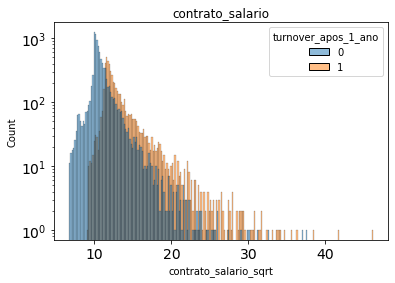

In [ ]:
plt.title('contrato_salario')
sns.histplot(x='contrato_salario_sqrt',data=df_s1,hue = 'turnover_apos_1_ano')
plt.semilogy()

(32.0, 40.0)

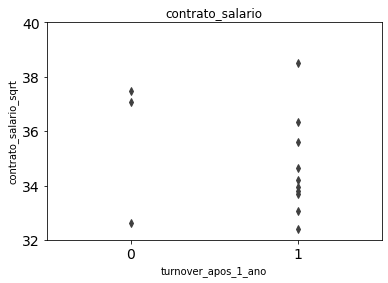

In [ ]:
plt.title('contrato_salario')
sns.boxplot(x = 'turnover_apos_1_ano',y='contrato_salario_sqrt',data=df_s1)
plt.ylim(32,40)

In [ ]:
df_s1n = df_s1.copy()

In [ ]:
df_s1n['contrato_salario_sqrt'][df_s1n['contrato_salario_sqrt'] >40] = 40
df_s1n['contrato_salario_sqrt'][df_s1n['contrato_salario_sqrt'] <9] = 9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[]

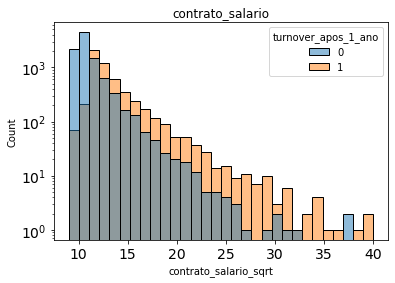

In [ ]:
plt.title('contrato_salario')
sns.histplot(x='contrato_salario_sqrt',data=df_s1n,hue = 'turnover_apos_1_ano',bins =30)
plt.semilogy()

In [ ]:
X_train1  = df_s1n.drop(columns='turnover_apos_1_ano')

In [ ]:
acerto_v1sn   = np.zeros(10)
j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1sn[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  j = j = j+1
print('dataset sn_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1sn),5),' erro:',np.format_float_positional(np.std(acerto_v1sn)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1sn),5))

f1_score 0.78283
f1_score 0.77551
f1_score 0.8014
f1_score 0.77945
f1_score 0.76182
f1_score 0.78804
f1_score 0.76746
f1_score 0.78952
f1_score 0.74592
f1_score 0.73684
dataset sn_1 f1-score:     0.77288  erro: 0.00604  desvio padrão: 0.0191


###Sexto teste: func_racacor
 
* Tratamento dos dados faltantes.
* Classe minoritária.
* Codificação das variáveis.

*** Tratamento dos dados faltantes***

In [ ]:
df_fr = df_t1.copy() 

In [ ]:
df_fr['func_racacor'].value_counts()

2    9682
0    2684
3    2611
1      23
Name: func_racacor, dtype: int64

In [ ]:
df_fr1 = df_fr.copy()
df_fr2 = df_fr.copy()
df_fr3 = df_fr.copy()

In [ ]:
df_fr1['func_racacor'].loc[df_fr1['func_racacor'] == 3] = 0
df_fr2['func_racacor'].loc[df_fr2['func_racacor'] == 3] = 1
df_fr3['func_racacor'].loc[df_fr3['func_racacor'] == 3] = 2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
X_train3  = df_fr3.drop(columns='turnover_apos_1_ano')
X_train2  = df_fr2.drop(columns='turnover_apos_1_ano')
X_train1  = df_fr1.drop(columns='turnover_apos_1_ano')
y_train   = df_fr['turnover_apos_1_ano']

In [ ]:
acerto_v1r    = np.zeros(10)
acerto_v2r    = np.zeros(10)
acerto_v3r    = np.zeros(10)

j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1r[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v2r[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,'CountEncoder','func_racacor','Dataframe')
  acerto_v3r[j] =  resultados(X_train3,y_train,linhas_treino,linhas_valid,'TargetEncoder','func_racacor','Dataframe')
  print('\n')

  j = j = j+1

print('dataset r_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1r),5),' erro:',np.format_float_positional(np.std(acerto_v1r)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1r),5))
print('dataset r_2 f1-score:    ',np.format_float_positional(np.mean(acerto_v2r),5),' erro:',np.format_float_positional(np.std(acerto_v2r)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v2r),5))
print('dataset r_3 f1-score:    ',np.format_float_positional(np.mean(acerto_v3r),5),' erro:',np.format_float_positional(np.std(acerto_v3r)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v3r),5))


f1_score 0.78049
f1_score 0.78571
f1_score 0.78646


f1_score 0.77352
f1_score 0.76801
f1_score 0.77963


f1_score 0.79861
f1_score 0.79789
f1_score 0.79755


f1_score 0.78616
f1_score 0.78092
f1_score 0.77562


f1_score 0.76042
f1_score 0.75514
f1_score 0.76379


f1_score 0.78169
f1_score 0.77454
f1_score 0.78169


f1_score 0.76267
f1_score 0.77580
f1_score 0.76523


f1_score 0.77579
f1_score 0.77607
f1_score 0.77844


f1_score 0.74088
f1_score 0.74229
f1_score 0.74270


f1_score 0.7468
f1_score 0.7534
f1_score 0.7483


dataset r_1 f1-score:     0.77070  erro: 0.00538  desvio padrão: 0.01703
dataset r_2 f1-score:     0.77098  erro: 0.00499  desvio padrão: 0.01579
dataset r_3 f1-score:     0.77194  erro: 0.00510  desivo padrão: 0.01613


**Classe miniotaria**

In [ ]:
df_fr2['func_racacor'].value_counts()

2    9682
0    2684
1    2634
Name: func_racacor, dtype: int64

* A classe deixou de ser minioritaria

**Codificação**

In [ ]:
df_f = df_fr2.copy() 

In [ ]:
df_f['func_racacor'] = df['func_racacor']

In [ ]:
df_f['func_racacor'][df_f['func_racacor'] =='SEM INFO'] = 'INDIGENA'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_f.head()

,func_sexo,func_racacor,func_escolaridade,func_uf,func_deficiencia,empresa_porte,empresa_setor,contrato_horastrabalho,contrato_salario,turnover_apos_1_ano,func_idade_log
0,1,AMARELA-BRANCA,2,7,0,2,5,11,1750.65,1,3.178054
1,1,INDIGENA,2,1,0,1,2,11,1002.30,0,3.178054
2,0,PRETA-PARDA,2,8,0,4,2,11,1370.14,0,3.218876
3,1,PRETA-PARDA,2,5,0,4,2,11,1854.68,1,3.988984
4,1,PRETA-PARDA,2,1,0,4,2,11,1126.23,0,3.688879


In [ ]:
df_f1 = df_f.copy()
df_f2 = df_f.copy()
df_f3 = df_f.copy()

In [ ]:
df_f1 = df_f1.join(pd.get_dummies(df_f1['func_racacor'], prefix=['func_racacor']))

In [ ]:
df_f1 = df_f1.drop(columns =['func_racacor'] )

In [ ]:
df_f1.head()

,func_sexo,func_escolaridade,func_uf,func_deficiencia,empresa_porte,empresa_setor,contrato_horastrabalho,contrato_salario,turnover_apos_1_ano,func_idade_log,['func_racacor']_AMARELA-BRANCA,['func_racacor']_INDIGENA,['func_racacor']_PRETA-PARDA
0,1,2,7,0,2,5,11,1750.65,1,3.178054,1,0,0
1,1,2,1,0,1,2,11,1002.30,0,3.178054,0,1,0
2,0,2,8,0,4,2,11,1370.14,0,3.218876,0,0,1
3,1,2,5,0,4,2,11,1854.68,1,3.988984,0,0,1
4,1,2,1,0,4,2,11,1126.23,0,3.688879,0,0,1


In [ ]:
X_train3  = df_f3.drop(columns='turnover_apos_1_ano')
X_train2  = df_f2.drop(columns='turnover_apos_1_ano')
X_train1  = df_f1.drop(columns='turnover_apos_1_ano')
y_train   = df_f['turnover_apos_1_ano']

In [ ]:
acerto_v1r    = np.zeros(10)
acerto_v2r    = np.zeros(10)
acerto_v3r    = np.zeros(10)

j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1r[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v2r[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,'CountEncoder','func_racacor','Dataframe')
  acerto_v3r[j] =  resultados(X_train3,y_train,linhas_treino,linhas_valid,'TargetEncoder','func_racacor','Dataframe')
  print('\n')

  j = j = j+1

print('dataset r_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1r),5),' erro:',np.format_float_positional(np.std(acerto_v1r)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1r),5))
print('dataset r_2 f1-score:    ',np.format_float_positional(np.mean(acerto_v2r),5),' erro:',np.format_float_positional(np.std(acerto_v2r)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v2r),5))
print('dataset r_3 f1-score:    ',np.format_float_positional(np.mean(acerto_v3r),5),' erro:',np.format_float_positional(np.std(acerto_v3r)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v3r),5))


f1_score 0.79098
f1_score 0.78238
f1_score 0.79034


f1_score 0.771
f1_score 0.76775
f1_score 0.763


f1_score 0.78665
f1_score 0.79471
f1_score 0.79507


f1_score 0.78628
f1_score 0.79218
f1_score 0.78023


f1_score 0.76052
f1_score 0.75236
f1_score 0.76141


f1_score 0.78284
f1_score 0.77954
f1_score 0.78314


f1_score 0.76224
f1_score 0.76814
f1_score 0.77728


f1_score 0.77277
f1_score 0.77816
f1_score 0.78803


f1_score 0.74094
f1_score 0.74613
f1_score 0.75204


f1_score 0.73366
f1_score 0.73994
f1_score 0.74219


dataset r_1 f1-score:     0.76879  erro: 0.00588  desvio padrão: 0.01859
dataset r_2 f1-score:     0.77013  erro: 0.00566  desvio padrão: 0.01791
dataset r_3 f1-score:     0.77327  erro: 0.00530  desivo padrão: 0.01676


### Teste sete: func_escolaridade

* Codificação da variável func_escolaridade

In [ ]:
df_fe = df_fr2.copy() 

In [ ]:
df_fe1 = df_fe.copy()
df_fe2 = df_fe.copy()
df_fe3 = df_fe.copy()

In [ ]:
df_fe1['func_escolaridade'] = df['func_escolaridade']
df_fe2['func_escolaridade'] = df['func_escolaridade']
df_fe3['func_escolaridade'] = df['func_escolaridade']

In [ ]:
df_fe1 = df_fe1.join(pd.get_dummies(df_fe1['func_escolaridade'], prefix=['func_escolaridade']))
df_fe1 = df_fe1.drop(columns =['func_escolaridade'] )

In [ ]:
X_train3  = df_fe3.drop(columns='turnover_apos_1_ano')
X_train2  = df_fe2.drop(columns='turnover_apos_1_ano')
X_train1  = df_fe1.drop(columns='turnover_apos_1_ano')
y_train   = df_fe['turnover_apos_1_ano']

In [ ]:
acerto_v1re    = np.zeros(10)
acerto_v2re    = np.zeros(10)
acerto_v3re    = np.zeros(10)

j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1re[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v2re[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,'CountEncoder','func_escolaridade','Dataframe')
  acerto_v3re[j] =  resultados(X_train3,y_train,linhas_treino,linhas_valid,'TargetEncoder','func_escolaridade','Dataframe')
  print('\n')
  j = j = j+1

print('dataset re_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1re),5),' erro:',np.format_float_positional(np.std(acerto_v1re)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1re),5))
print('dataset re_2 f1-score:    ',np.format_float_positional(np.mean(acerto_v2re),5),' erro:',np.format_float_positional(np.std(acerto_v2re)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v2re),5))
print('dataset re_3 f1-score:    ',np.format_float_positional(np.mean(acerto_v3re),5),' erro:',np.format_float_positional(np.std(acerto_v3re)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v3re),5))


f1_score 0.78390
f1_score 0.79074
f1_score 0.78299


f1_score 0.77493
f1_score 0.76762
f1_score 0.77778


f1_score 0.79789
f1_score 0.80279
f1_score 0.79861


f1_score 0.77580
f1_score 0.78062
f1_score 0.78092


f1_score 0.75413
f1_score 0.75427
f1_score 0.7569


f1_score 0.77641
f1_score 0.78329
f1_score 0.77193


f1_score 0.76011
f1_score 0.76089
f1_score 0.76854


f1_score 0.77108
f1_score 0.77002
f1_score 0.7691


f1_score 0.74244
f1_score 0.74229
f1_score 0.75022


f1_score 0.74241
f1_score 0.75432
f1_score 0.73798


dataset re_1 f1-score:     0.76791  erro: 0.00538  desvio padrão: 0.01702
dataset re_2 f1-score:     0.77068  erro: 0.00560  desvio padrão: 0.01772
dataset re_3 f1-score:     0.7695  erro: 0.00525  desivo padrão: 0.01661


### Teste oito: Estados

* Codificação da variável

In [ ]:
df_es = df_fr2.copy() 

In [ ]:
df_es1 = df_es.copy()
df_es2 = df_es.copy()
df_es3 = df_es.copy()

In [ ]:
df_es1['func_uf'] = df['func_uf']
df_es2['func_uf'] = df['func_uf']
df_es3['func_uf'] = df['func_uf']

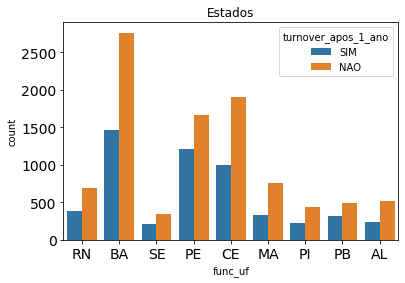

In [ ]:
plt.title('Estados')
sns.countplot(x = 'func_uf',data = df,hue = 'turnover_apos_1_ano')

In [ ]:
df_es1 = df_es1.join(pd.get_dummies(df_es1['func_uf'], prefix=['func_uf']))
df_es1 = df_es1.drop(columns =['func_uf'] )

In [ ]:
X_train3  = df_es3.drop(columns='turnover_apos_1_ano')
X_train2  = df_es2.drop(columns='turnover_apos_1_ano')
X_train1  = df_es1.drop(columns='turnover_apos_1_ano')
y_train   = df_es['turnover_apos_1_ano']

In [ ]:
acerto_v1es    = np.zeros(10)
acerto_v2es    = np.zeros(10)
acerto_v3es    = np.zeros(10)

j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1es[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v2es[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,'CountEncoder','func_uf','Dataframe')
  acerto_v3es[j] =  resultados(X_train3,y_train,linhas_treino,linhas_valid,'TargetEncoder','func_uf','Dataframe')
  print('\n')

  j = j = j+1

print('dataset es_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1es),5),' erro:',np.format_float_positional(np.std(acerto_v1es)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1es),5))
print('dataset es_2 f1-score:    ',np.format_float_positional(np.mean(acerto_v2es),5),' erro:',np.format_float_positional(np.std(acerto_v2es)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v2es),5))
print('dataset es_3 f1-score:    ',np.format_float_positional(np.mean(acerto_v3es),5),' erro:',np.format_float_positional(np.std(acerto_v3es)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v3es),5))


f1_score 0.78665
f1_score 0.79053
f1_score 0.78201


f1_score 0.75375
f1_score 0.77836
f1_score 0.77098


f1_score 0.79396
f1_score 0.81157
f1_score 0.80594


f1_score 0.77807
f1_score 0.78345
f1_score 0.77836


f1_score 0.75
f1_score 0.7526
f1_score 0.75


f1_score 0.77385
f1_score 0.77277
f1_score 0.77719


f1_score 0.75536
f1_score 0.76868
f1_score 0.76992


f1_score 0.77949
f1_score 0.77778
f1_score 0.78535


f1_score 0.74255
f1_score 0.74865
f1_score 0.73429


f1_score 0.74133
f1_score 0.75342
f1_score 0.7534


dataset es_1 f1-score:     0.76550  erro: 0.00572  desvio padrão: 0.01809
dataset es_2 f1-score:     0.77378  erro: 0.0058  desvio padrão: 0.01833
dataset es_3 f1-score:     0.77074  erro: 0.00612  desivo padrão: 0.01934


 
 
### Teste 9: empresa_porte
 
* Codificação da variável.
 
 


In [ ]:
df_ep = df_fr2.copy() 

In [ ]:
df_ep1 = df_ep.copy()
df_ep2 = df_ep.copy()
df_ep3 = df_ep.copy()

In [ ]:
df_ep1['empresa_porte'] = df['empresa_porte']
df_ep2['empresa_porte'] = df['empresa_porte']
df_ep3['empresa_porte'] = df['empresa_porte']

In [ ]:
df_ep1 = df_ep1.join(pd.get_dummies(df_ep1['empresa_porte'], prefix=['empresa_porte']))
df_ep1 = df_ep1.drop(columns =['empresa_porte'])

In [ ]:
X_train3  = df_ep3.drop(columns='turnover_apos_1_ano')
X_train2  = df_ep2.drop(columns='turnover_apos_1_ano')
X_train1  = df_ep1.drop(columns='turnover_apos_1_ano')
y_train   = df_ep['turnover_apos_1_ano']

In [ ]:
acerto_v1ep    = np.zeros(10)
acerto_v2ep    = np.zeros(10)
acerto_v3ep    = np.zeros(10)

j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1ep[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v2ep[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,'CountEncoder','empresa_porte','Dataframe')
  acerto_v3ep[j] =  resultados(X_train3,y_train,linhas_treino,linhas_valid,'TargetEncoder','empresa_porte','Dataframe')
  print('\n')

  j = j = j+1

print('dataset ep_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1ep),5),' erro:',np.format_float_positional(np.std(acerto_v1ep)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1ep),5))
print('dataset ep_2 f1-score:    ',np.format_float_positional(np.mean(acerto_v2ep),5),' erro:',np.format_float_positional(np.std(acerto_v2ep)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v2ep),5))
print('dataset ep_3 f1-score:    ',np.format_float_positional(np.mean(acerto_v3ep),5),' erro:',np.format_float_positional(np.std(acerto_v3ep)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v3ep),5))


f1_score 0.79034
f1_score 0.79512
f1_score 0.77622


f1_score 0.77739
f1_score 0.78185
f1_score 0.78049


f1_score 0.79965
f1_score 0.80279
f1_score 0.80352


f1_score 0.78238
f1_score 0.79543
f1_score 0.79505


f1_score 0.7541
f1_score 0.75897
f1_score 0.76607


f1_score 0.77942
f1_score 0.77981
f1_score 0.79086


f1_score 0.76165
f1_score 0.76182
f1_score 0.76386


f1_score 0.77673
f1_score 0.77586
f1_score 0.79156


f1_score 0.73905
f1_score 0.75386
f1_score 0.75862


f1_score 0.74927
f1_score 0.74833
f1_score 0.75624


dataset ep_1 f1-score:     0.771  erro: 0.00577  desvio padrão: 0.01826
dataset ep_2 f1-score:     0.77538  erro: 0.00570  desvio padrão: 0.01804
dataset ep_3 f1-score:     0.77825  erro: 0.00499  desivo padrão: 0.01579


### Teste 10 : empresa_setor

* Codificação da variável

In [ ]:
df_est = df_fr2.copy() 

In [ ]:
df_est1 = df_est.copy()
df_est2 = df_est.copy()
df_est3 = df_est.copy()

In [ ]:
df_est1['empresa_setor'] = df['empresa_setor']
df_est2['empresa_setor'] = df['empresa_setor']
df_est3['empresa_setor'] = df['empresa_setor']

In [ ]:
df_est1 = df_est1.join(pd.get_dummies(df_est1['empresa_setor'], prefix=['empresa_setor']))
df_est1 = df_est1.drop(columns =['empresa_setor'])

In [ ]:
X_train3  = df_est3.drop(columns='turnover_apos_1_ano')
X_train2  = df_est2.drop(columns='turnover_apos_1_ano')
X_train1  = df_est1.drop(columns='turnover_apos_1_ano')
y_train   = df_est['turnover_apos_1_ano']

In [ ]:
df_est1.head()

,func_sexo,func_racacor,func_escolaridade,func_uf,func_deficiencia,empresa_porte,contrato_horastrabalho,contrato_salario,turnover_apos_1_ano,func_idade_log,['empresa_setor']_Administraçao pública,['empresa_setor']_Agricultura,['empresa_setor']_Comércio,['empresa_setor']_Construçao civil,['empresa_setor']_Indústria,['empresa_setor']_Serviços
0,1,0,2,7,0,2,11,1750.65,1,3.178054,0,0,0,0,0,1
1,1,1,2,1,0,1,11,1002.30,0,3.178054,0,0,1,0,0,0
2,0,2,2,8,0,4,11,1370.14,0,3.218876,0,0,1,0,0,0
3,1,2,2,5,0,4,11,1854.68,1,3.988984,0,0,1,0,0,0
4,1,2,2,1,0,4,11,1126.23,0,3.688879,0,0,1,0,0,0


In [ ]:
acerto_v1est    = np.zeros(10)
acerto_v2est    = np.zeros(10)
acerto_v3est    = np.zeros(10)

j = 0
for linhas_treino, linhas_valid in kf.split(X_train1):
  acerto_v1est[j] =  resultados(X_train1,y_train,linhas_treino,linhas_valid,0,0,'Dataframe')
  acerto_v2est[j] =  resultados(X_train2,y_train,linhas_treino,linhas_valid,'CountEncoder','empresa_setor','Dataframe')
  acerto_v3est[j] =  resultados(X_train3,y_train,linhas_treino,linhas_valid,'TargetEncoder','empresa_setor','Dataframe')
  print('\n')

  j = j = j+1

print('dataset est_1 f1-score:    ',np.format_float_positional(np.mean(acerto_v1est),5),' erro:',np.format_float_positional(np.std(acerto_v1est)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v1est),5))
print('dataset est_2 f1-score:    ',np.format_float_positional(np.mean(acerto_v2est),5),' erro:',np.format_float_positional(np.std(acerto_v2est)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v2est),5))
print('dataset est_3 f1-score:    ',np.format_float_positional(np.mean(acerto_v3est),5),' erro:',np.format_float_positional(np.std(acerto_v3est)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v3est),5))


f1_score 0.7864
f1_score 0.79021
f1_score 0.78540


f1_score 0.77289
f1_score 0.77487
f1_score 0.77352


f1_score 0.7951
f1_score 0.79754
f1_score 0.80494


f1_score 0.78376
f1_score 0.78393
f1_score 0.77591


f1_score 0.76027
f1_score 0.76199
f1_score 0.76166


f1_score 0.76978
f1_score 0.78023
f1_score 0.77544


f1_score 0.76418
f1_score 0.76283
f1_score 0.76622


f1_score 0.76870
f1_score 0.78186
f1_score 0.77042


f1_score 0.75113
f1_score 0.74662
f1_score 0.74503


f1_score 0.74432
f1_score 0.75
f1_score 0.75294


dataset est_1 f1-score:     0.76965  erro: 0.00473  desvio padrão: 0.01497
dataset est_2 f1-score:     0.77301  erro: 0.00510  desvio padrão: 0.01613
dataset est_3 f1-score:     0.77115  erro: 0.00502  desivo padrão: 0.01588


# Conclusão.
 
* Nesse notebook foi visto que a melhor maneira encontrada de tratar os dados strings foi através da aplicação do Label Encoder. E foi tratado os valores zero da variável horas de trabalho pela sua média e esses dados também foram agrupados.
 
* Também foi visto que a variável de Target está desequilibrada. Logo, vale tentar equilibrar as classes para ver como o modelo vai empenhar.


